# Data Analysis and Visualization of M1 Expert Pies
<t>By: Avinash Bisram</t>

<h2>Table of Contents</h2>
<ul>
    <li><a href="#1.0">1.0 Initial Data Exploration</a>
        <ul>
            <li><a href="#1.0.1">1.0.1 Head of Dataset</a></li>
            <li><a href="#1.0.2">1.0.2 Column Names</a></li>
            <li><a href="#1.0.3">1.0.3 Column Data Types</a></li>
            <li><a href="#1.0.4">1.0.4 Check for Missing Data in Columns</a></li>
        </ul>
    </li>
    <li><a href="#2.0">2.0 Cleaning the Data</a>
        <ul>
            <li><a href="#2.0.1">2.0.1 Dropping Unwanted Columns</a></li>
            <li><a href="#2.0.2">2.0.2 Filling the Missing Data</a></li>
            <li><a href="#2.0.3">2.0.3 Recasting Column Data Types</a></li>
        </ul>
    </li>
    <li><a href="#3.0">3.0 Final Data Exploration</a>
        <ul>
            <li><a href="#3.0.1">3.0.1 NEW Head of Dataset</a></li>
            <li><a href="#3.0.2">3.0.2 NEW Column Names</a></li>
            <li><a href="#3.0.3">3.0.3 NEW Column Data Types</a></li>
            <li><a href="#3.0.4">3.0.4 NEW Check for Missing Data in Columns</a></li>
        </ul>
    </li>
    <li><a href="#4.0">4.0 Data Visualization</a>
        <ul>
            <li><a href="#4.1">4.1 Annual Dividend Yield (%)</a>
                <ul>
                    <li><a href="#4.1.1">4.1.1 Visualizing trends in Annual Dividend Yield (%) in relation to projected Retirement Year and Risk Type</a></li>
                    <li><a href="#4.1.2">4.1.2 Post-Viz Questions on Annual Dividend Yield (%)</a></li>
                    <li><a href="#4.1.3">4.1.3 Trend Summary on Annual Dividend Yield (%)</a></li>
                </ul>
            </li>
            <li><a href="#4.2">4.2 Historic 1 year returns (%)</a>
                <ul>
                    <li><a href="#4.2.1">4.2.1 Visualizing trends in Historic 1 year returns (%) in relation to projected Retirement Year and Risk Type</a></li>
                    <li><a href="#4.2.2">4.2.2 Post-Viz Questions on Historic 1-Year Return</a></li>
                    <li><a href="#4.2.3">4.2.3 Trend Summary on Historic 1-Year Return (%)</a></li>
                </ul>
            </li>
            <li><a href="#4.3">4.3 Historic 3 year returns (%)</a>
                <ul>
                    <li><a href="#4.3.1">4.3.1 Visualizing trends in Historic 3 year returns (%) in relation to projected Retirement Year and Risk Type</a></li>
                    <li><a href="#4.3.2">4.3.2 Post-Viz Questions on Historic 3-Year Return</a></li>
                    <li><a href="#4.3.3">4.3.3 Trend Summary of Historic 3-Year Return (%)</a></li>
                </ul>
            </li>
            <li><a href="#4.4">4.4 Historic 5 year returns (%)</a>
                <ul>
                    <li><a href="#4.4.1">4.4.1 Visualizing trends in Historic 5 year returns (%) in relation to projected Retirement Year and Risk Type</a></li>
                    <li><a href="#4.4.2">4.4.2 Post-Viz Questions on Historic 5-Yer Return</a></li>
                    <li><a href="#4.4.3">4.4.3 Trend Summary of Historic 5-Year Return (%)</a></li>
                </ul>
            </li>
            <li><a href="#4.5">4.5 Percentage Allocated per Overall Security Type</a>
                <ul>
                    <li><a href="#4.5.1">4.5.1 Creating columns for percentage allocation of each type of security</a></li>
                    <li><a href="#4.5.2">4.5.2 Creating views of the data for each Risk Type</a></li>
                    <li><a href="#4.5.3">4.5.3 Visualizing percentage allocation of Security Types (Aggressive Pies)</a></li>
                    <li><a href="#4.5.4">4.5.4 Trend Sumamary of % allocation per Security Type (Aggressive Pies)</a></li>
                    <li><a href="#4.5.5">4.5.5 Visualizing percentage allocation of Security Types (Moderate Pies)</a></li>
                    <li><a href="#4.5.6">4.5.6 Trend Summary of % allocation per Security Type (Moderate Pies)</a></li>
                    <li><a href="#4.5.7">4.5.7 Visualizing percentage allocation of Security Types (Conservative Pies)</a></li>
                    <li><a href="#4.5.8">4.5.8 Trend Summary of % allocation per Security Type (Conservative Pies)</a></li>
                </ul>
            </li>
            <li><a href="#4.6">4.6 Percentage Allocated per Individual Security</a>
                <ul>
                    <li><a href="#4.6.1">4.6.1 Visualizing Percentage allocation of individual securities (Aggressive Pies)</a></li>
                    <li><a href="#4.6.2">4.6.2 Post-Viz Questions on Percentage Allocation per Individual Security (Aggressive Pies)</a></li>
                    <li><a href="#4.6.3">4.6.3 Trend Summary of % allocation per Individual Security (Aggressive Pies)</a></li>
                    <li><a href="#4.6.4">4.6.4 Visualizing percentage allocation of individual securities (Moderate Pies)</a></li>
                    <li><a href="#4.6.5">4.6.5 Post-Viz Questions on Percentage Allocation per Individual Security (Moderate Pies)</a></li>
                    <li><a href="#4.6.6">4.6.6 Trend Summary of % allocation per Individual Security (Moderate Pies)</a></li>
                    <li><a href="#4.6.7">4.6.7 Visualizing percentage allocation of individual securities (Conservative Pies)</a></li>
                    <li><a href="#4.6.8">4.6.8 Post-Viz Questions on Percentage Allocation per Individual Security (Conservative Pies)</a></li>
                    <li><a href="#4.6.9">4.6.9 Trend Summary of % allocation per Individual Security (Conservative Pies)</a></li>
                </ul>
            </li>
            <li><a href="#4.7">4.7 Geographical Concentrations of Securities</a>
                <ul>
                    <li><a href="#4.7.1">4.7.1 Creating aggregations of the data for primary Geographical Concentration of Securities</a></li>
                    <li><a href="#4.7.2">4.7.2 Visualizing the Percentage Allocation of each Geographical Concentration</a></li>
                    <li><a href="#4.7.3">4.7.3 Trend Summary of % allocation per Geographical Concentration (Conservative Pies)</a></li>
                </ul>
            </li>
            <li><a href="#4.8">4.8 General Cap Preference (Small/Mid/Large)</a>
                <ul>
                    <li><a href="#4.8.1">4.8.1 Creating views of the data for each cap size</a></li>
                    <li><a href="#4.8.2">4.8.2 Visualizing the Percentage Allocation of each Cap Size</a></li>
                    <li><a href="#4.8.3">4.8.3 Trend Summary of % allocation per Cap Size</a></li>
                </ul>
            </li>
            <li><a href="#4.9">4.9 Preference of Value vs. Growth ETFs</a>
                <ul>
                    <li><a href="#4.9.1">4.9.1 Creating views of the data for Value and Growth ETFs</a></li>
                    <li><a href="#4.9.2">4.9.2 Visualizing the Percentage Allocations of Value vs. Growth ETFs</a></li>
                    <li><a href="#4.9.3">4.9.3 Trend Summary of % allocation for Value vs. Growth ETFs</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li><a href="#5.0">5.0 Future Plans for this Project</a></li>
</ul>

<t><b>Analysis Questions:</b><br>How does changing the retirement year and/or the risk of the investments affect the...</t>
<ol>
    <li>Annual dividend yields?</li>
    <li>Historic 1-year, 3-year, and 5-year returns?</li>
    <li>Relative percentage allocated to each type of security (cash, stocks, bond, commodity/blend)?</li>
    <li>Top 5 individual fund preferences?</li>
    <li>Bottom 5 individual fund preferences?</li>
    <li>Preference of fund location (US, international, or all)?</li>
    <li>Allocation of the different caps?</li>
    <li>Preference of value vs. growth funds?</li>
</ol>

<a id='0.0.1'></a>
<b>0.0.1 Importing necessary libraries</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id='0.0.2'></a>
<b>0.0.2 Reading in the data</b>

In [2]:
raw = pd.read_csv("m1_pies.csv") # Data as of 7/10/21

<a id='1.0'></a>
## 1.0 Initial Data Exploration

<a id='1.0.1'></a>
<b>1.0.1 Head of Dataset</b>

In [3]:
raw.head() # First 5 rows

,Retire_Year,Risk_Type,Holdings,Expenses,Dividend_Yield,Risk_Level,Return_1Y,Return_3Y,Return_5Y,BIL,...,VOE,VOO,VOT,VTV,VUG,VWO,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,2020,Aggressive,19,0.08,2.07,Medium low,26.64,42.48,73.04,2.0,...,4,8,3,9,7,5,NaN,NaN,NaN,NaN
1,2020,Conservative,19,0.09,2.52,Medium low,13.13,32.51,45.37,3.0,...,2,4,2,4,3,2,NaN,NaN,NaN,NaN
2,2020,Moderate,19,0.09,2.33,Medium low,19.73,37.51,58.01,3.0,...,3,6,2,7,5,3,NaN,NaN,NaN,NaN
3,2025,Aggressive,19,0.08,2.06,Medium,30.17,44.32,79.63,1.0,...,4,9,3,10,8,6,NaN,NaN,NaN,NaN
4,2025,Conservative,19,0.09,2.61,Medium low,14.94,34.89,49.87,2.0,...,2,4,2,5,4,3,NaN,NaN,NaN,NaN


<a id='1.0.2'></a>
<b>1.0.2 Column Names</b>

In [4]:
raw.columns # Looks like we have a few unwanted columns at the end

Index(['Retire_Year', 'Risk_Type', 'Holdings', 'Expenses', 'Dividend_Yield',
       'Risk_Level', 'Return_1Y', 'Return_3Y', 'Return_5Y', 'BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

<a id='1.0.3'></a>
<b>1.0.3 Column Data Types</b>

In [5]:
raw.dtypes

Retire_Year         int64
Risk_Type          object
Holdings            int64
Expenses          float64
Dividend_Yield    float64
Risk_Level         object
Return_1Y         float64
Return_3Y         float64
Return_5Y         float64
BIL               float64
BIV                 int64
BLV                 int64
BNDX              float64
BSV               float64
DBC                 int64
TIP               float64
VB                  int64
VBK                 int64
VBR                 int64
VEA                 int64
VNQ                 int64
VO                  int64
VOE                 int64
VOO                 int64
VOT                 int64
VTV                 int64
VUG                 int64
VWO                 int64
Unnamed: 28       float64
Unnamed: 29       float64
Unnamed: 30       float64
Unnamed: 31        object
dtype: object

<a id='1.0.4'></a>
<b>1.0.4 Check for Missing Data in Columns</b>

In [6]:
raw.isnull().sum()

Retire_Year        0
Risk_Type          0
Holdings           0
Expenses           0
Dividend_Yield     0
Risk_Level         0
Return_1Y          0
Return_3Y          0
Return_5Y          0
BIL               16
BIV                0
BLV                0
BNDX               2
BSV               15
DBC                0
TIP               12
VB                 0
VBK                0
VBR                0
VEA                0
VNQ                0
VO                 0
VOE                0
VOO                0
VOT                0
VTV                0
VUG                0
VWO                0
Unnamed: 28       27
Unnamed: 29       27
Unnamed: 30       27
Unnamed: 31       26
dtype: int64

<a id='2.0'></a>
## 2.0 Cleaning the Data

<a id='2.0.1'></a>
<b>2.0.1 Dropping Unwanted Columns</b>

In [7]:
raw = raw.drop(columns=['Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'])

<a id='2.0.2'></a>
<b>2.0.2 Filling the Missing Data</b>

In [8]:
# Remaining missing data is only present in Percentage Allocated per Security columns so a NULL value is equivalent 
# to 0% allocation.

raw = raw.fillna(0)

<a id='2.0.3'></a>
<b>2.0.3 Recasting Column Data Types</b>

In [9]:
# Standardizing all Percentage Allocation columns to integer data types.

raw['BIL'] = raw['BIL'].astype('int64')
raw['BNDX'] = raw['BNDX'].astype('int64')
raw['BSV'] = raw['BSV'].astype('int64')
raw['TIP'] = raw['TIP'].astype('int64')

<a id='3.0'></a>
## 3.0 Final Data Exploration

<a id='3.0.1'></a>
<b>3.0.1 NEW Head of Dataset</b>

In [10]:
raw.head()

,Retire_Year,Risk_Type,Holdings,Expenses,Dividend_Yield,Risk_Level,Return_1Y,Return_3Y,Return_5Y,BIL,...,VBR,VEA,VNQ,VO,VOE,VOO,VOT,VTV,VUG,VWO
0,2020,Aggressive,19,0.08,2.07,Medium low,26.64,42.48,73.04,2,...,2,15,2,4,4,8,3,9,7,5
1,2020,Conservative,19,0.09,2.52,Medium low,13.13,32.51,45.37,3,...,1,7,2,2,2,4,2,4,3,2
2,2020,Moderate,19,0.09,2.33,Medium low,19.73,37.51,58.01,3,...,2,11,2,3,3,6,2,7,5,3
3,2025,Aggressive,19,0.08,2.06,Medium,30.17,44.32,79.63,1,...,3,18,3,4,4,9,3,10,8,6
4,2025,Conservative,19,0.09,2.61,Medium low,14.94,34.89,49.87,2,...,1,9,2,2,2,4,2,5,4,3


<a id='3.0.2'></a>
<b>3.0.2 NEW Column Names</b>

In [11]:
raw.columns # No more 'Unnamed' columns

Index(['Retire_Year', 'Risk_Type', 'Holdings', 'Expenses', 'Dividend_Yield',
       'Risk_Level', 'Return_1Y', 'Return_3Y', 'Return_5Y', 'BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO'],
      dtype='object')

<a id='3.0.3'></a>
<b>3.0.3 NEW Column Data Types</b>

In [12]:
raw.dtypes 

Retire_Year         int64
Risk_Type          object
Holdings            int64
Expenses          float64
Dividend_Yield    float64
Risk_Level         object
Return_1Y         float64
Return_3Y         float64
Return_5Y         float64
BIL                 int64
BIV                 int64
BLV                 int64
BNDX                int64
BSV                 int64
DBC                 int64
TIP                 int64
VB                  int64
VBK                 int64
VBR                 int64
VEA                 int64
VNQ                 int64
VO                  int64
VOE                 int64
VOO                 int64
VOT                 int64
VTV                 int64
VUG                 int64
VWO                 int64
dtype: object

<a id='3.0.4'></a>
<b>3.0.4 NEW Check for Missing Data in Columns</b>

In [13]:
raw.isnull().sum() # No more missing values

Retire_Year       0
Risk_Type         0
Holdings          0
Expenses          0
Dividend_Yield    0
Risk_Level        0
Return_1Y         0
Return_3Y         0
Return_5Y         0
BIL               0
BIV               0
BLV               0
BNDX              0
BSV               0
DBC               0
TIP               0
VB                0
VBK               0
VBR               0
VEA               0
VNQ               0
VO                0
VOE               0
VOO               0
VOT               0
VTV               0
VUG               0
VWO               0
dtype: int64

<a id='4.0'></a>
## 4.0 Data Visualization

<a id='4.1'></a>
### 4.1 Annual Dividend Yield (%)

<a id='4.1.1'></a>
<b>4.1.1 Visualizing trends in Annual Dividend Yield (%) in relation to projected Retirement Year and Risk Type</b>

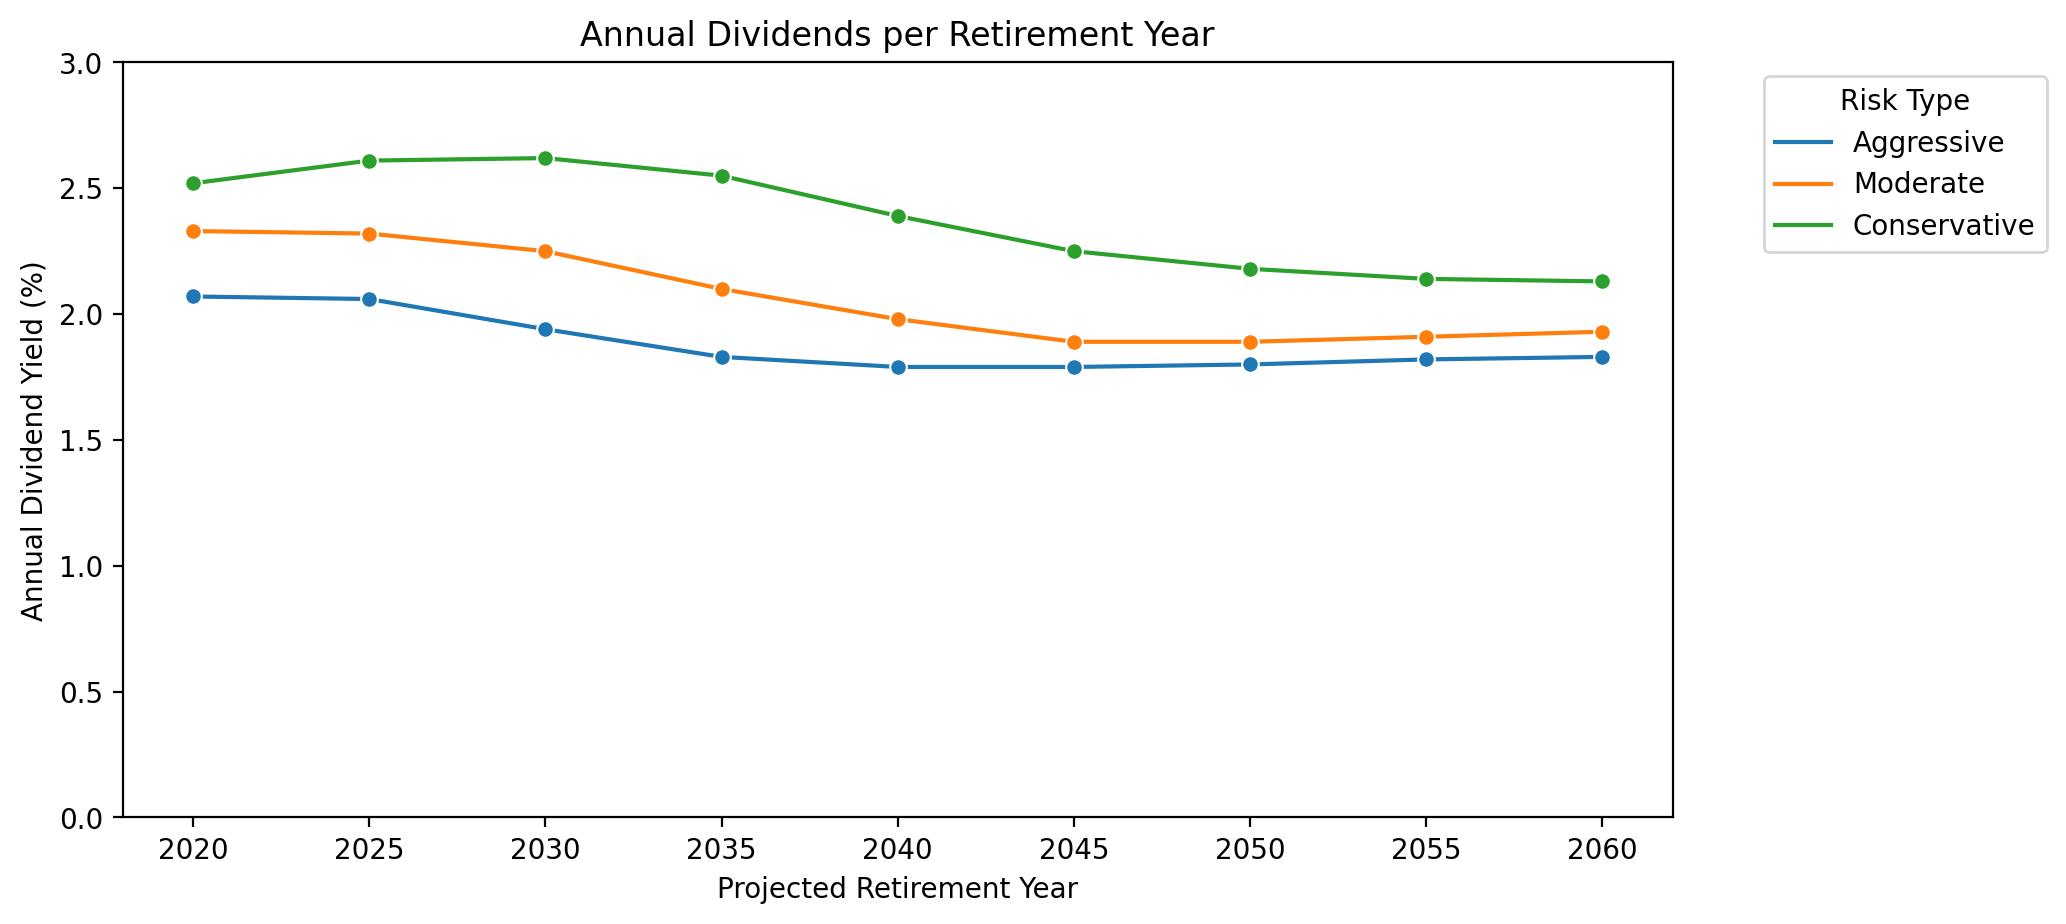

In [14]:
plt.figure(figsize=(10,5), dpi=200)
plt.title('Annual Dividends per Retirement Year')
sns.lineplot(data=raw, x='Retire_Year', y='Dividend_Yield', hue='Risk_Type', hue_order=['Aggressive','Moderate','Conservative'], marker='o');
plt.xlabel('Projected Retirement Year')
plt.ylabel('Annual Dividend Yield (%)')
plt.legend(title='Risk Type', loc='upper left', bbox_to_anchor=(1.05,1))
plt.ylim(0.0,3.0)
plt.show()

<a id='4.1.2'></a>
<b>4.1.2 Post-Viz Questions on Annual Dividend Yield (%)</b>

In [15]:
# Which pie can expect the highest Annual Dividend Yield %?

raw[['Retire_Year', 'Risk_Type', 'Dividend_Yield']].nlargest(n=1, columns='Dividend_Yield')

,Retire_Year,Risk_Type,Dividend_Yield
7,2030,Conservative,2.62


In [16]:
# Which pie can expect the lowest Annual Dividend Yield %?

raw[['Retire_Year', 'Risk_Type', 'Dividend_Yield']].nsmallest(n=1, columns='Dividend_Yield')

,Retire_Year,Risk_Type,Dividend_Yield
12,2040,Aggressive,1.79


In [17]:
# What retirement year had the LARGEST ADY% difference between Risk Types?

ADY_view = raw[['Retire_Year','Dividend_Yield']].groupby(['Retire_Year']).Dividend_Yield.agg(ADY_min=('min'),ADY_max=('max')).reset_index().copy()
ADY_view['ADY_Diff'] = ADY_view['ADY_max'] - ADY_view['ADY_min']
ADY_view[['Retire_Year','ADY_Diff']].nlargest(n=1,columns='ADY_Diff')

,Retire_Year,ADY_Diff
3,2035,0.72


In [18]:
# What retirement year had the SMALLEST ADY% difference between Risk Types?

ADY_view[['Retire_Year','ADY_Diff']].nsmallest(n=1,columns='ADY_Diff')

,Retire_Year,ADY_Diff
8,2060,0.3


In [19]:
ADY_view[['Retire_Year','ADY_Diff']]

,Retire_Year,ADY_Diff
0,2020,0.45
1,2025,0.55
2,2030,0.68
3,2035,0.72
4,2040,0.60
5,2045,0.46
6,2050,0.38
7,2055,0.32
8,2060,0.30


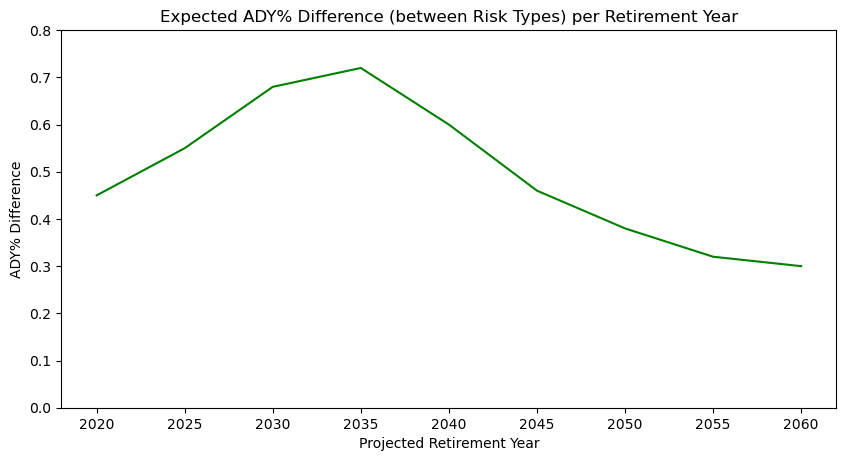

In [20]:
# Taking a quick look at how the ADY_diff changes over time

plt.figure(figsize=(10,5), dpi=100)
plt.title('Expected ADY% Difference (between Risk Types) per Retirement Year')
sns.lineplot(data=ADY_view[['Retire_Year','ADY_Diff']], x='Retire_Year', y='ADY_Diff', color='green')
plt.xlabel('Projected Retirement Year')
plt.ylabel('ADY% Difference')
plt.ylim(0,0.8)
plt.show()

<a id='4.1.3'></a>
<b>4.1.3 Trend Summary of Annual Dividend Yield (%)</b>

<ol>
    <li>Across all projected retirement years, Conservative Pies can expect the highest Annual Dividend Yield (ADY%), followed by Moderate Pies, and finally Aggressive Pies. (More aggressive pies of the same year can generally expect lower ADY%)</li>
    <li>Expected ADY% is seen to either increase or plateau until ~ 2030, after which it decreases until ~2045, before either plateauing again or slightly increasing until 2060.</li>
    <li>Per-year fluctuations in ADY% appear to become more pronounced as Risk Type becomes less aggressive. The Conservative trend line appears more S-shaped as opposed to the more aggressive portfolios that feature less drastic peaks and dips over time.</li>
    <li>Variations in ADY% between pies of the same projected retirement year (but different Risk Types) appear to increase until ~2035, then continues to decrease until 2060..</li>
</ol>

<a id='4.2'></a>
### 4.2 Historic 1 year returns (%)

<a id='4.2.1'></a>
<b>4.2.1 Visualizing trends in Historic 1 year returns (%) in relation to projected Retirement Year and Risk Type</b>

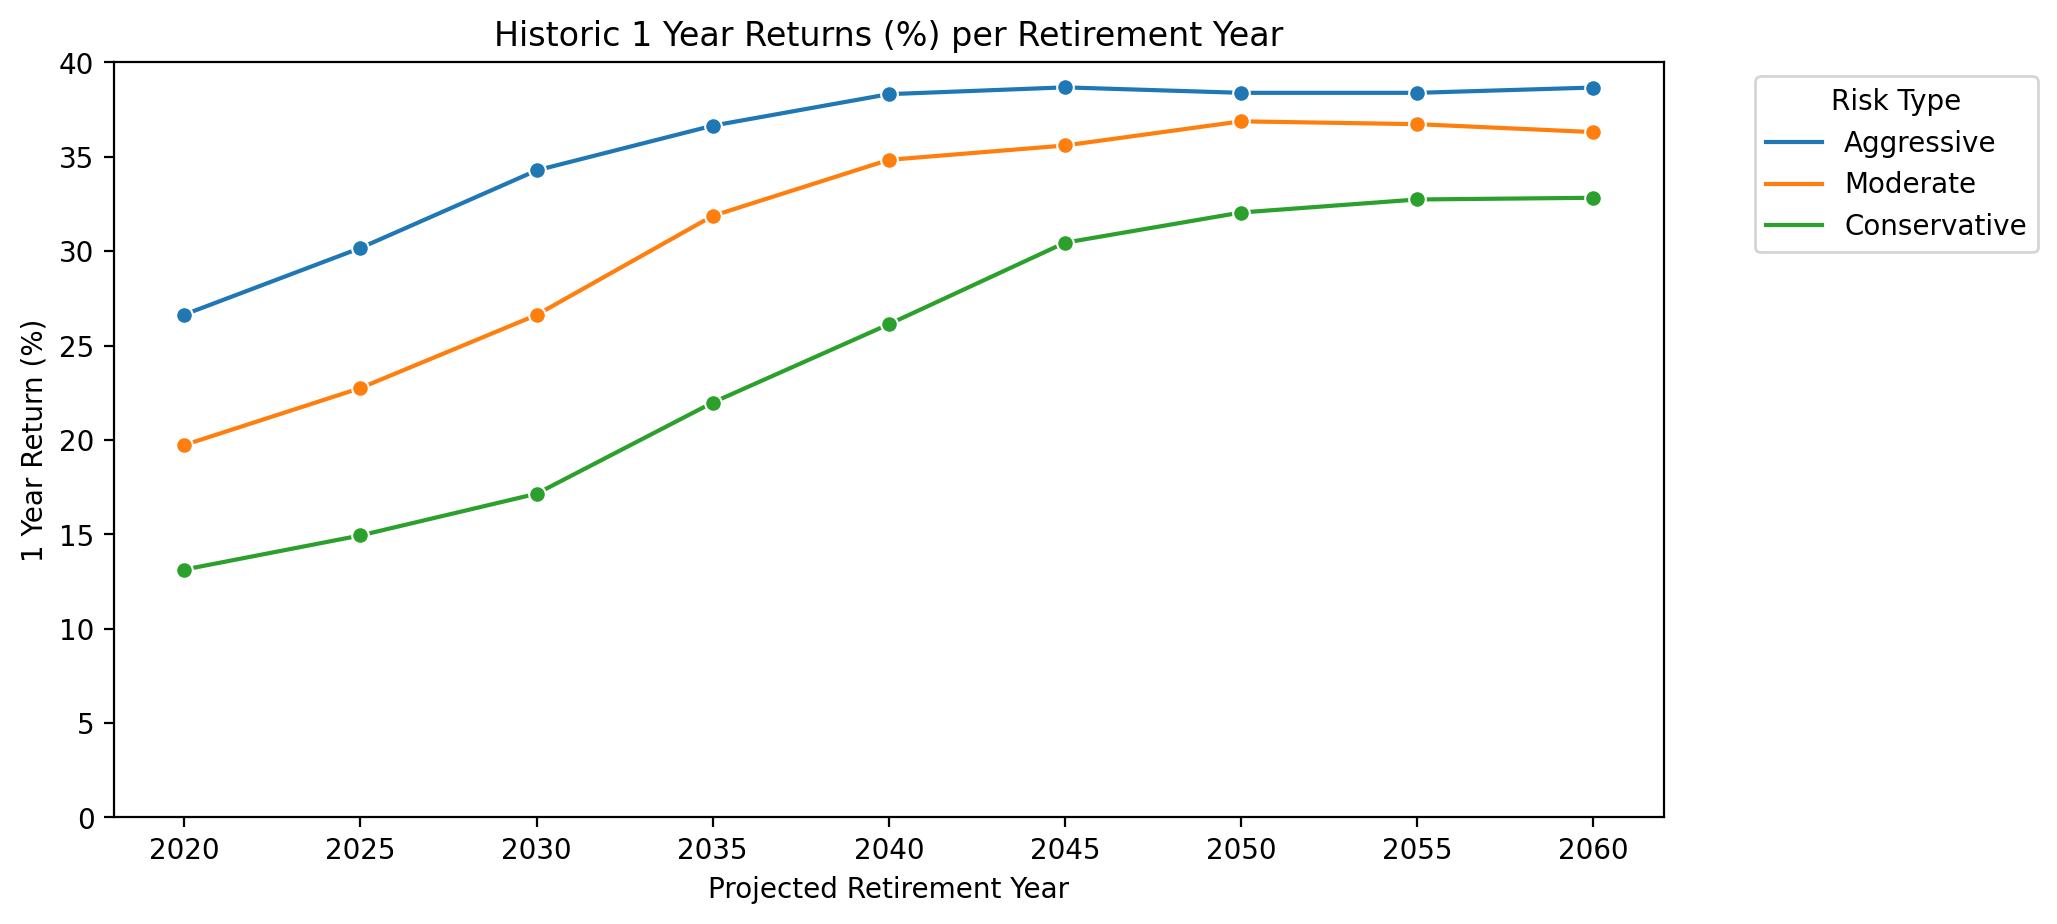

In [21]:
plt.figure(figsize=(10,5), dpi=200)
plt.title("Historic 1 Year Returns (%) per Retirement Year")
sns.lineplot(data=raw, x='Retire_Year', y='Return_1Y', hue='Risk_Type', hue_order=['Aggressive','Moderate','Conservative'], marker='o');
plt.xlabel('Projected Retirement Year')
plt.ylabel('1 Year Return (%)')
plt.legend(title='Risk Type', loc='upper left', bbox_to_anchor=(1.05,1))
plt.ylim(0,40);

<a id='4.2.2'></a>
<strong>4.2.2 Post-Viz Questions on Historic 1-Year Return</strong>

In [22]:
# Which pie has the largest 1-year return?

raw[['Retire_Year', 'Risk_Type', 'Return_1Y']].nlargest(n=1, columns="Return_1Y")

,Retire_Year,Risk_Type,Return_1Y
15,2045,Aggressive,38.68


In [23]:
# Which pie has the smallest 1-year return?

raw[['Retire_Year', 'Risk_Type', 'Return_1Y']].nsmallest(n=1, columns="Return_1Y")

,Retire_Year,Risk_Type,Return_1Y
1,2020,Conservative,13.13


In [24]:
# Taking a look at how 1YR changes over time.

OneYR_view = raw[['Retire_Year','Return_1Y']].groupby(['Retire_Year']).Return_1Y.agg(OneYR_min=('min'), OneYR_max=('max')).reset_index().copy()
OneYR_view['OneYR_Diff'] = OneYR_view['OneYR_max'] - OneYR_view['OneYR_min']
OneYR_view[['Retire_Year','OneYR_Diff']]

,Retire_Year,OneYR_Diff
0,2020,13.51
1,2025,15.23
2,2030,17.13
3,2035,14.67
4,2040,12.19
5,2045,8.23
6,2050,6.34
7,2055,5.65
8,2060,5.84


<a id='4.2.3'></a>
<b>4.2.3 Trend Summary of Historic 1-Year Return (%)</b>

<ol>
    <li>Within the same projected retirement year, Aggressive Pies can consistently observe the highest historic 1-Year Return (%), followed by Moderate and then Conservative Pies.</li>
    <li>Generally speaking, as projected retirement year increases, historic 1 year return also increases .</li>
    <li>Small increases in 1Y Return can be seen from 2020-2030, followed by a much more pronounced increase until 2040-2045, and finally tapering off into plateau into 2060.</li>
    <li>The largest disparity between 1Y Return of pies of the same retirement year can be seen early on (until 2030) with that disparity decreasing as time goes on.</li>
</ol>

<a id='4.3'></a>
### 4.3 Historic 3 year returns (%)

<a id='4.3.1'></a>
<b>4.3.1 Visualizing trends in Historic 3 year returns (%) in relation to projected Retirement Year and Risk Type</b>

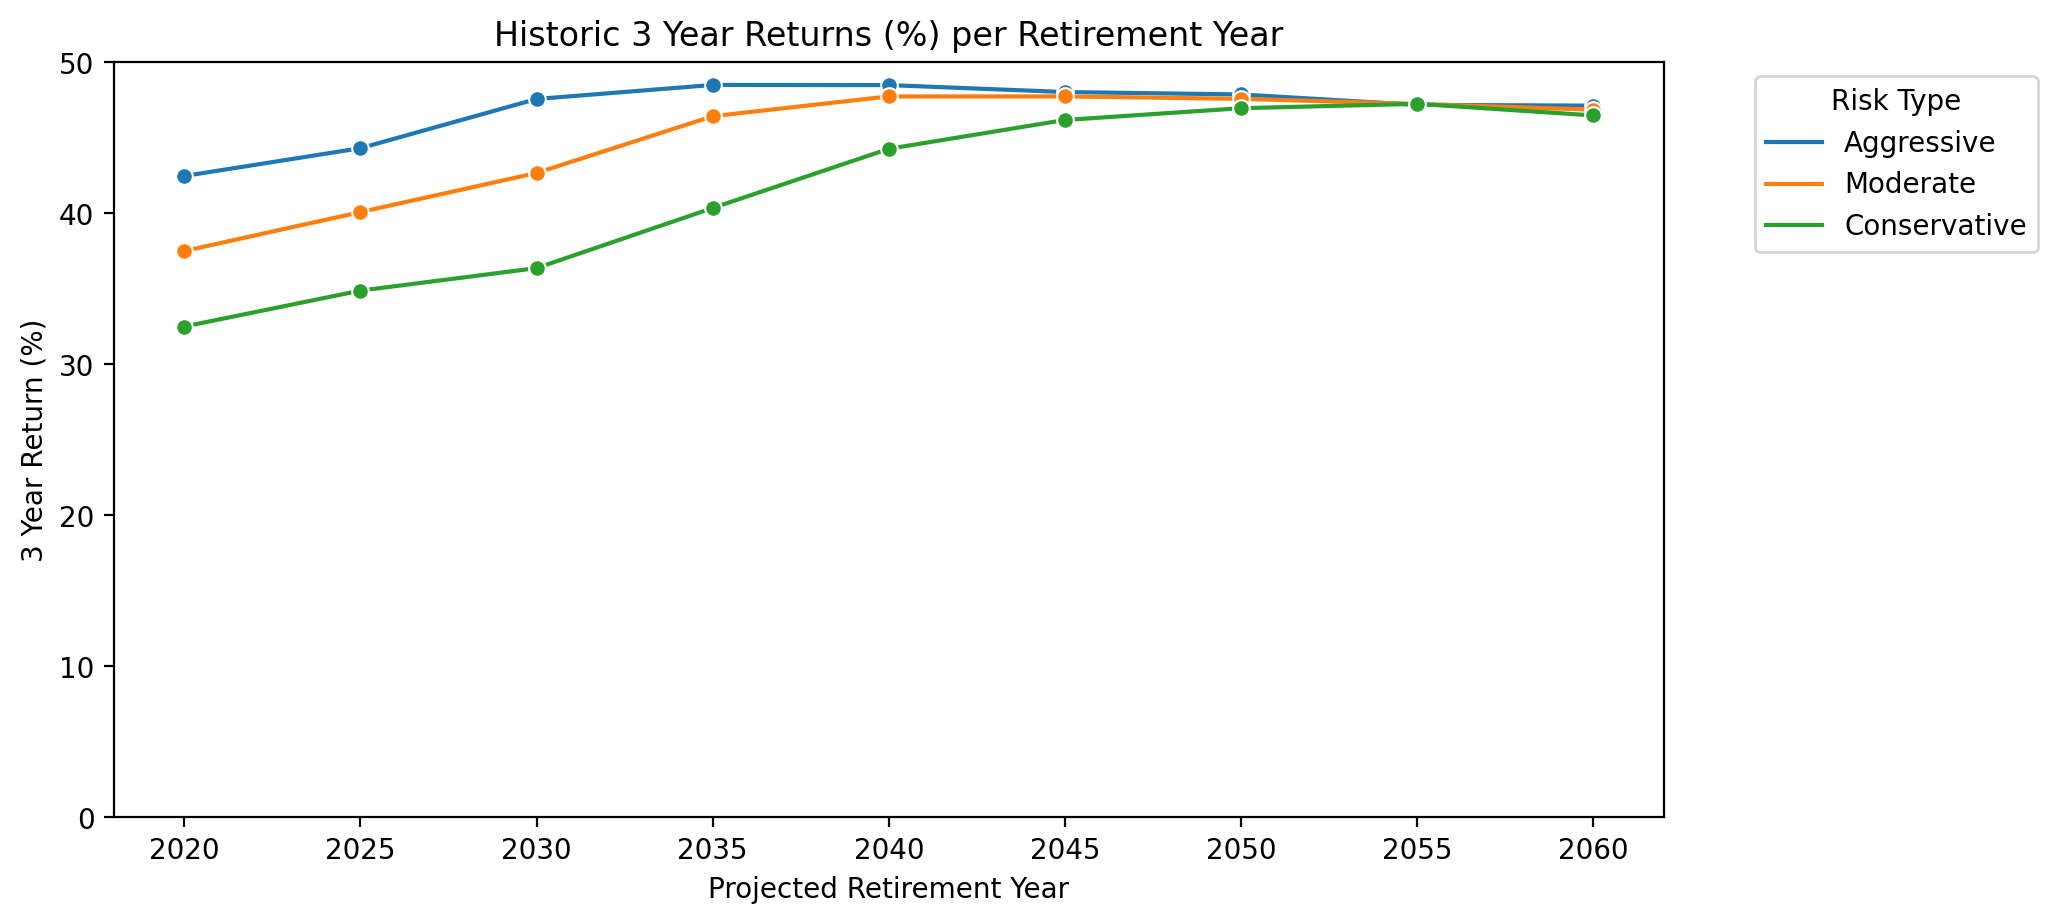

In [25]:
plt.figure(figsize=(10,5), dpi=200)
plt.title("Historic 3 Year Returns (%) per Retirement Year")
sns.lineplot(data=raw, x='Retire_Year',  y='Return_3Y', hue='Risk_Type', hue_order=['Aggressive','Moderate','Conservative'], marker='o');
plt.xlabel('Projected Retirement Year')
plt.ylabel('3 Year Return (%)')
plt.legend(title='Risk Type', loc='upper left', bbox_to_anchor=(1.05,1))
plt.ylim(0,50)
plt.show()

<a id='4.3.2'></a>
<strong>4.3.2 Post-Viz Questions on Historic 3-Year Return</strong>

In [26]:
# Which pie has the largest 3-year return?

raw[['Retire_Year', 'Risk_Type', 'Return_3Y']].nlargest(n=1, columns="Return_3Y")

,Retire_Year,Risk_Type,Return_3Y
9,2035,Aggressive,48.51


In [27]:
# Which pie has the smallest 3-year return?
raw[['Retire_Year', 'Risk_Type', 'Return_3Y']].nsmallest(n=1, columns="Return_3Y")

,Retire_Year,Risk_Type,Return_3Y
1,2020,Conservative,32.51


In [28]:
# Looking closer at the possible convergence point
raw[['Retire_Year', 'Risk_Type', 'Return_3Y']][raw['Retire_Year']==2055].iloc[[0,2,1]].sort_values(by='Return_3Y', ascending=False)

# As we can see, the more conservative pies now have higher 3-year returns. (Convergence is somewhere between 2050 and 2055)

,Retire_Year,Risk_Type,Return_3Y
22,2055,Conservative,47.26
23,2055,Moderate,47.25
21,2055,Aggressive,47.19


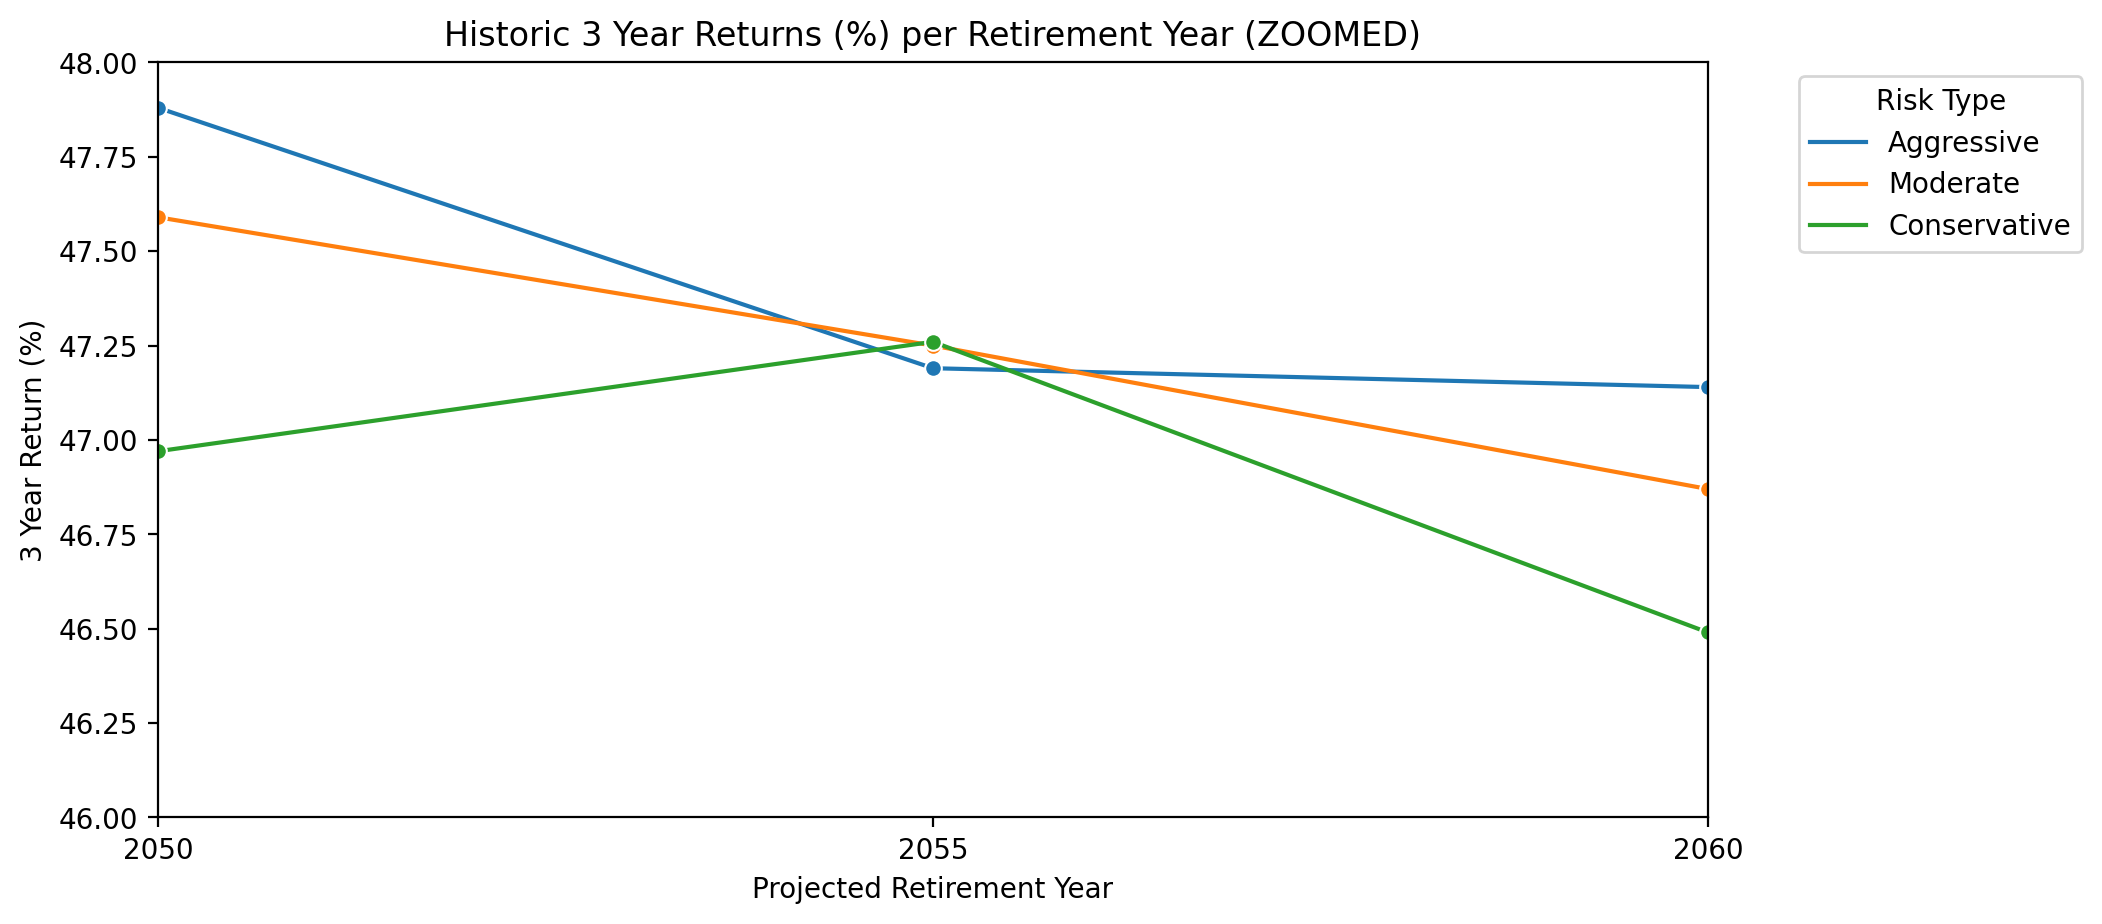

In [29]:
# Zoom in on x{2050:2060} and y{40:50}

plt.figure(figsize=(10,5), dpi=200)
plt.title("Historic 3 Year Returns (%) per Retirement Year (ZOOMED)")
sns.lineplot(data=raw, x='Retire_Year',  y='Return_3Y', hue='Risk_Type', hue_order=['Aggressive','Moderate','Conservative'], marker='o');
plt.xlabel('Projected Retirement Year')
plt.ylabel('3 Year Return (%)')
plt.legend(title='Risk Type', loc='upper left', bbox_to_anchor=(1.05,1))
plt.xlim(2050,2060)
plt.ylim(46,48)
plt.xticks([2050,2055,2060])
plt.show()

<a id='4.3.3'></a>
<b>4.3.3 Trend Summary of Historic 3-Year Return (%)</b>

<ol>
    <li>Before 2050, Aggressive Pies observe the highest 3Y Return, followed (closely) by Moderate and then Conservative Pies.</li>
    <li>At 2055, orientation of trend lines invert (more conservative pies can expect higher 3-year return) but differences between them can be considered negligible (within 0.25% of each other).</li>
    <li>All trend lines increase from 2020-2040, after which the Conservative trend line continues to increase until 2050 (other trend lines either plateau or observe very slight decreases). After 2050, the three trend lines can be said to converge and then plateau.</li>
</ol>

<a id='4.4'></a>
### 4.4 Historic 5 year returns (%)

<a id='4.4.1'></a>
<b>4.4.1 Visualizing trends in Historic 5 year returns (%) in relation to projected Retirement Year and Risk Type</b>

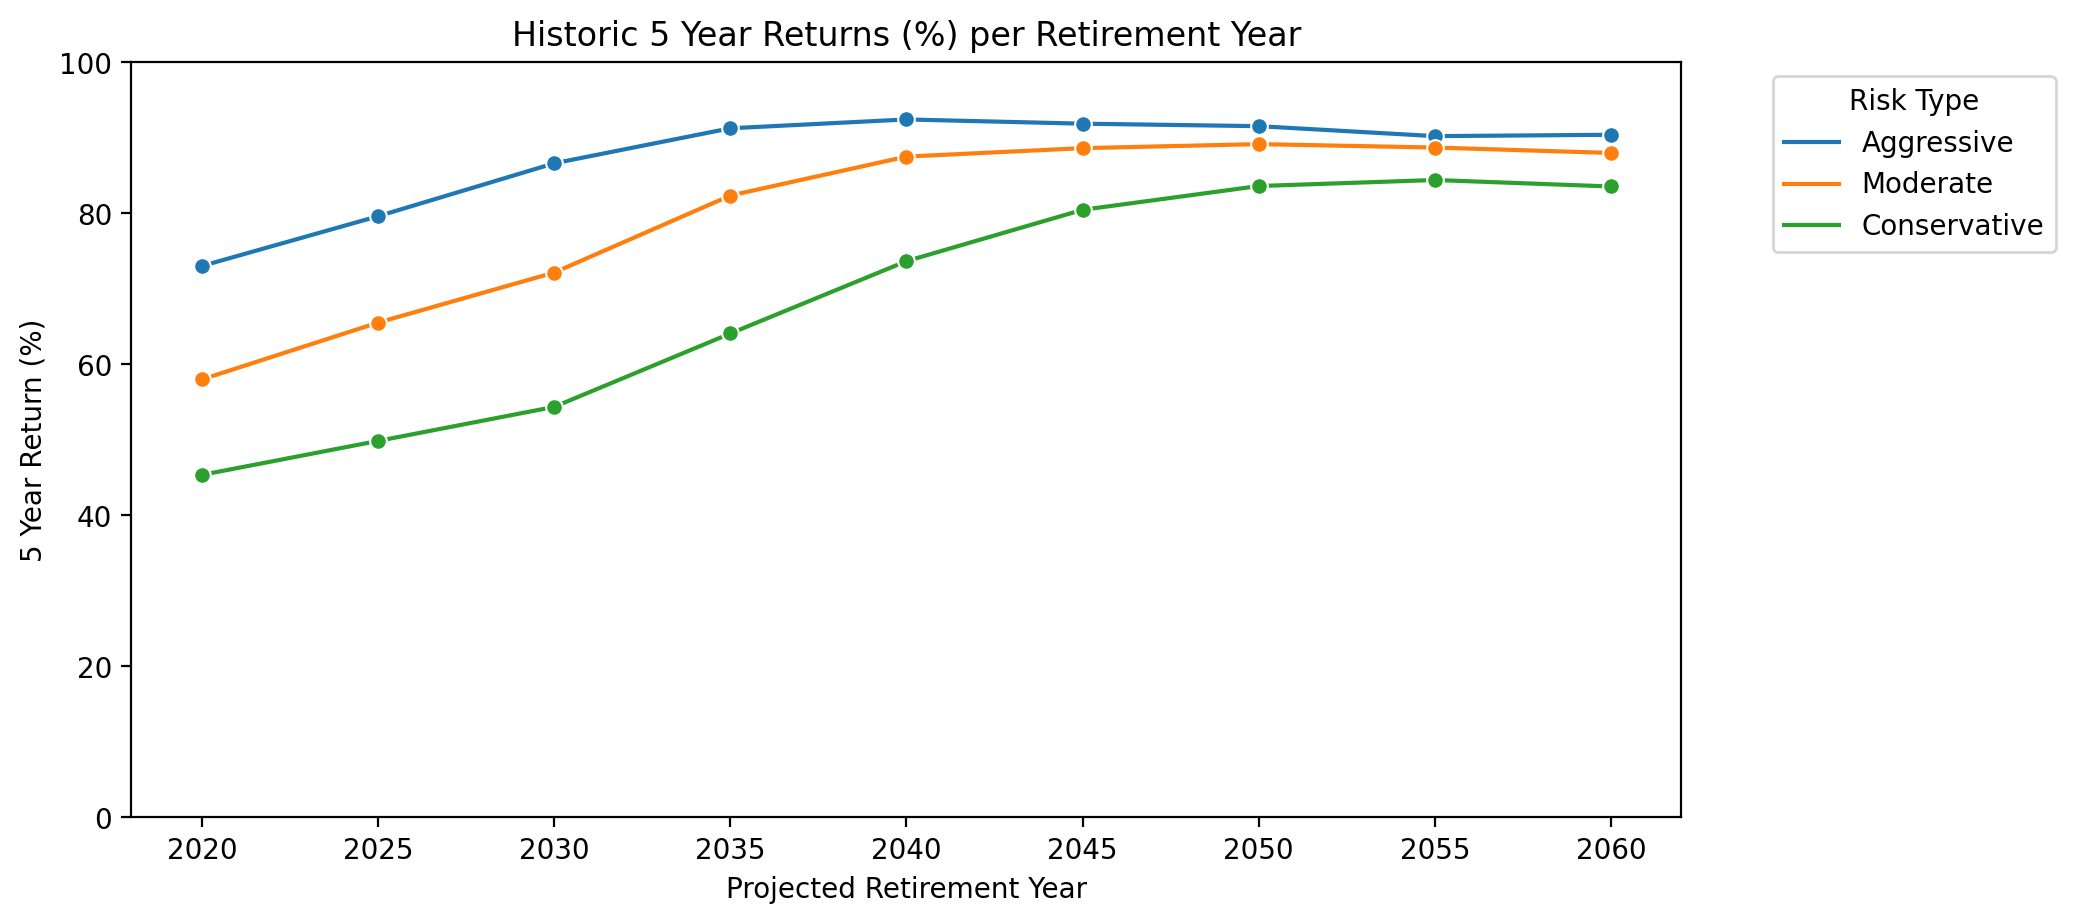

In [30]:
plt.figure(figsize=(10,5), dpi=200)
plt.title("Historic 5 Year Returns (%) per Retirement Year")
sns.lineplot(data=raw, x='Retire_Year', y='Return_5Y', hue='Risk_Type', hue_order=['Aggressive','Moderate','Conservative'], marker='o');
plt.xlabel('Projected Retirement Year')
plt.ylabel('5 Year Return (%)')
plt.legend(title='Risk Type', loc='upper left', bbox_to_anchor=(1.05,1))
plt.ylim(0,100);

<a id='4.4.2'></a>
<strong>4.4.2 Post-Viz Questions on Historic 5-Year Return</strong>

In [31]:
# Which pie has the largest 5-year return?

display(raw[['Retire_Year', 'Risk_Type', 'Return_5Y']].nlargest(n=1, columns="Return_5Y"))

,Retire_Year,Risk_Type,Return_5Y
12,2040,Aggressive,92.45


In [32]:
# Which pie has the smallest 5-year return?

display(raw[['Retire_Year', 'Risk_Type', 'Return_5Y']].nsmallest(n=1, columns="Return_5Y"))

,Retire_Year,Risk_Type,Return_5Y
1,2020,Conservative,45.37


<a id='4.4.3'></a>
<b>4.4.3 Trend Summary of Historic 5-Year Return (%)</b>

<ol>
    <li>Within the same projected retirement year, Aggressive pies consistently observe higher 5-year returns followed by Moderate, and then Conservative Pies.</li>
    <li>All trend lines can be seen to increase until 2040, then either plateau or keep increasing (Conservative Pies) until 2050, before all relatively plateauing into 2060.</li>
    <li>The largest disparity within same retirement year can be seen early on but that disparity decreases as retirement year increases.</li>
</ol>

<a id='4.5'></a>
### 4.5 Percentage Allocated per Overall Security Type

<a id='4.5.1'></a>
<b>4.5.1 Creating columns for percentage allocation of each type of security</b>

In [33]:
# Categorized based on each security's large type majority

raw['Total_Cash'] = raw['BIL']
raw['Total_Bonds'] = raw['BIV'] + raw['BLV'] + raw['BNDX'] + raw['BSV'] + raw['TIP']
raw['Total_Blend'] = raw['DBC']
raw['Total_Stocks'] = raw['VB'] + raw['VBK'] + raw['VBR'] + raw['VEA'] + raw['VNQ'] + raw['VO'] + raw['VOE'] + raw['VOO'] + raw['VOT'] + raw['VTV'] + raw['VUG'] + raw['VWO']

<a id='4.5.2'></a>
<b>4.5.2 Creating views of the data for each Risk Type</b>

In [34]:
all_aggressive = raw[raw['Risk_Type']=='Aggressive']
all_moderate = raw[raw['Risk_Type']=='Moderate']
all_conservative = raw[raw['Risk_Type']=='Conservative']

<a id='4.5.3'></a>
<b>4.5.3 Visualizing percentage allocation of Security Types (Aggressive Pies)</b>

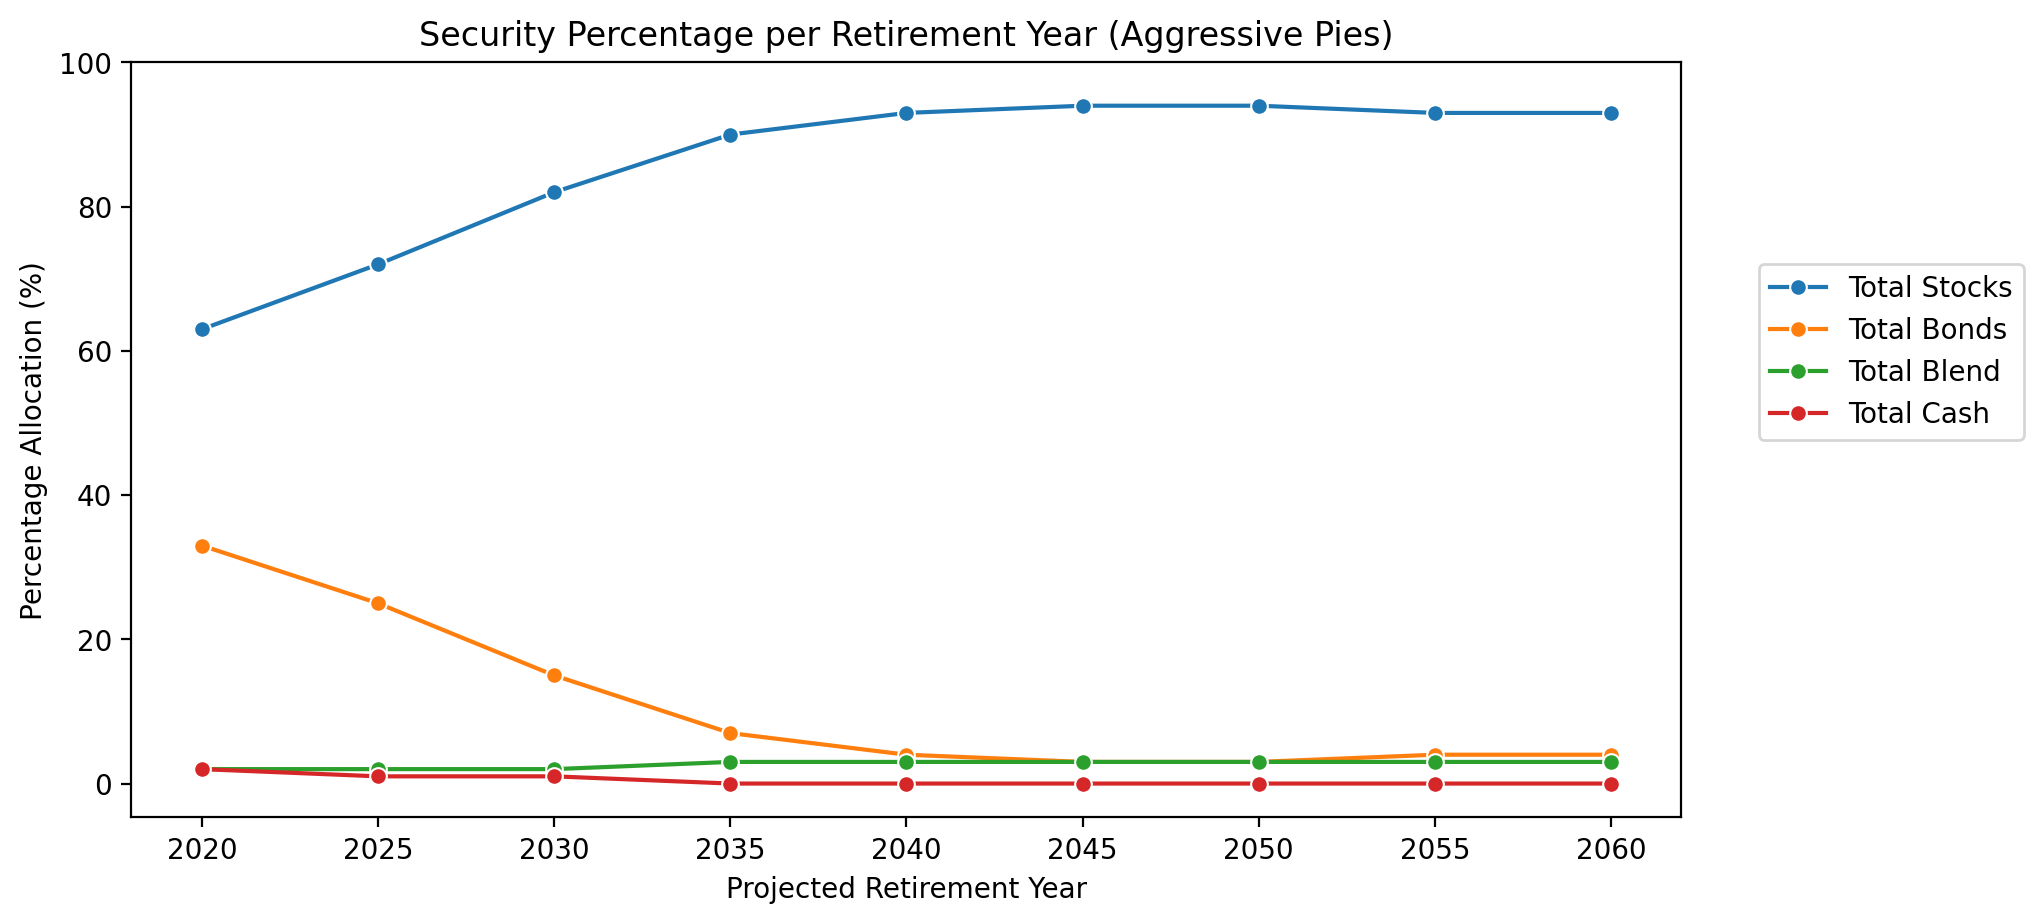

In [35]:
fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Aggressive Pies)")
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks', marker='o')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds', marker='o')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend', marker='o')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash', marker='o')
plt.xlabel("Projected Retirement Year")
plt.ylabel("Percentage Allocation (%)")
plt.legend(loc=(1.05,0.5))
plt.ylim(top=100)
plt.show()

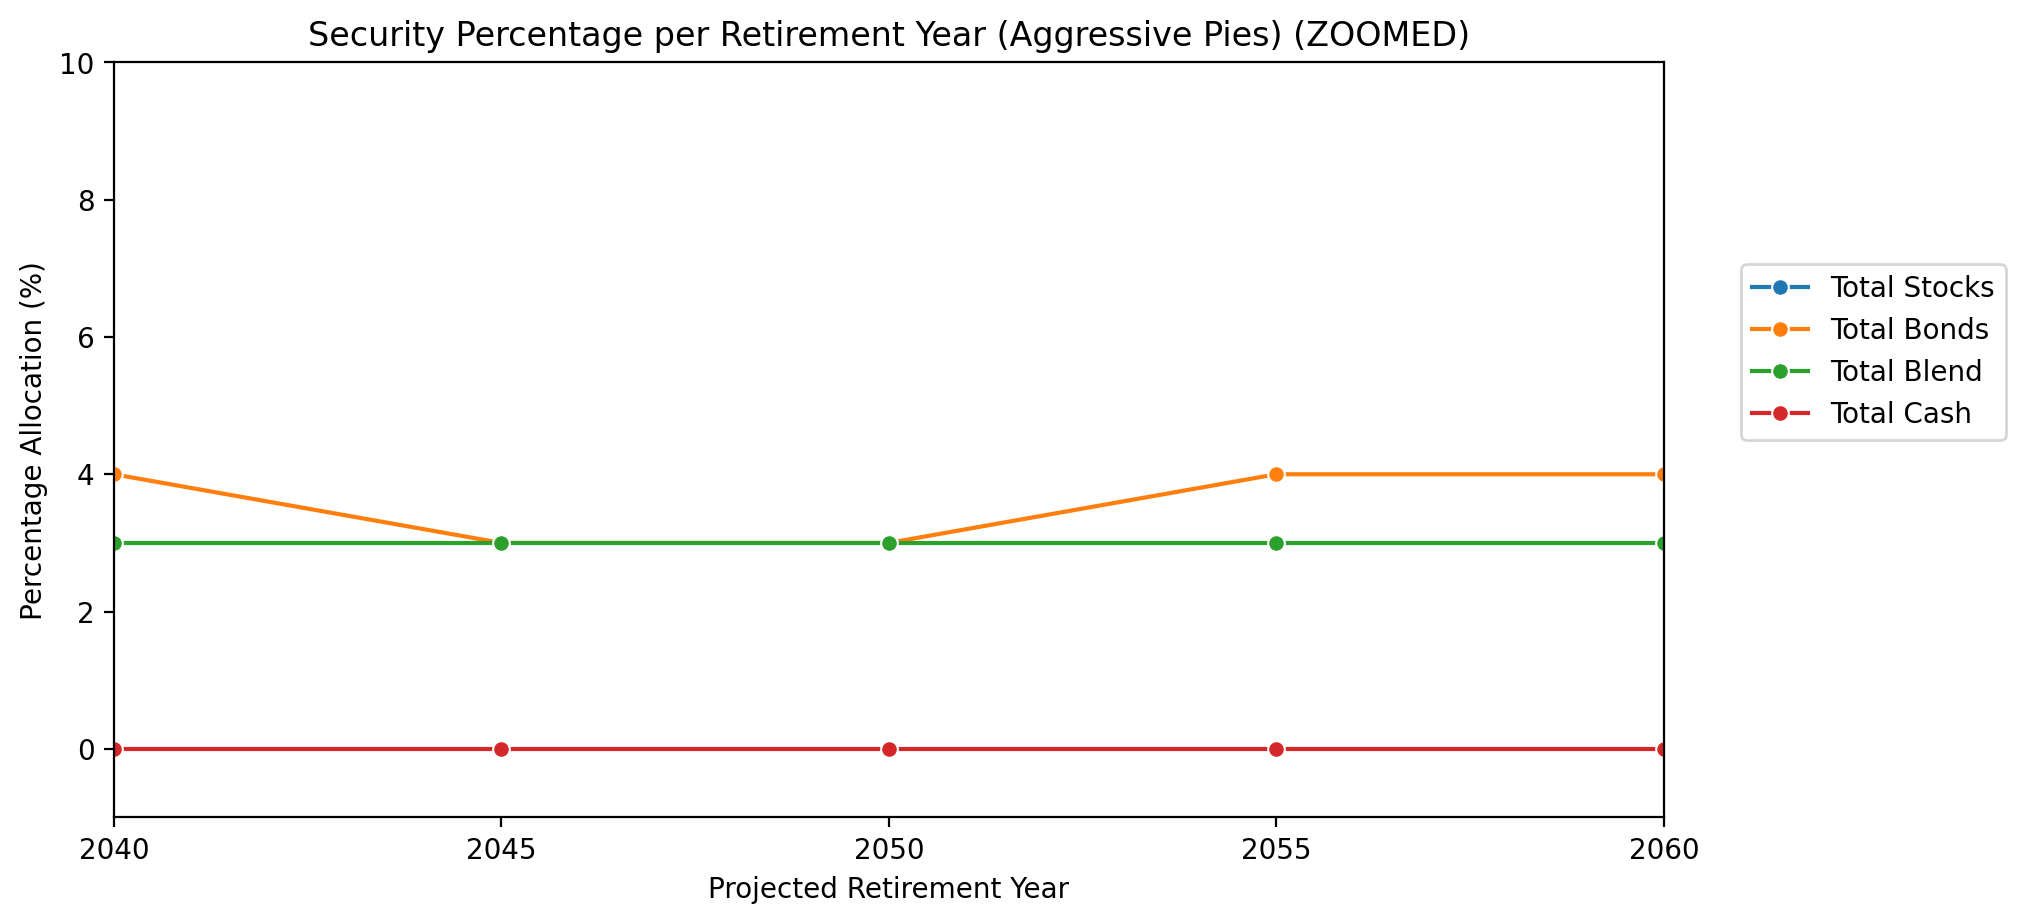

In [36]:
# Zoom in on x{2040:2060} and y{0:20}

fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Aggressive Pies) (ZOOMED)")
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks', marker='o')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds', marker='o')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend', marker='o')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash', marker='o')
plt.xlabel("Projected Retirement Year")
plt.ylabel("Percentage Allocation (%)")
plt.legend(loc=(1.05,0.5))
plt.xlim(2040,2060)
plt.ylim(-1,10)
plt.xticks([2040,2045,2050,2055,2060])
plt.show()

<a id='4.5.4'></a>
<b>4.5.4 Trend Summary of % allocation per Security Type (Aggressive Pies)</b>

<ol>
    <li>Generally, the percentage allocation of Stocks can be seen to increase as projected retirement year increases, while allocation into Bonds decreases. Allocation into Cash remains relatively negligible throughout, while allocation into Blend securities (combination of different security types) increases very slightly before plateauing.</li>
    <li>At and after 2050, all trend lines appear to plateau, indicating no drastic changes to pie composition from that point onwards (regarding percentage allocation into various security types).</li>
</ol>

<a id='4.5.5'></a>
<b>4.5.5 Visualizing percentage allocation of Security Types (Moderate Pies)</b>

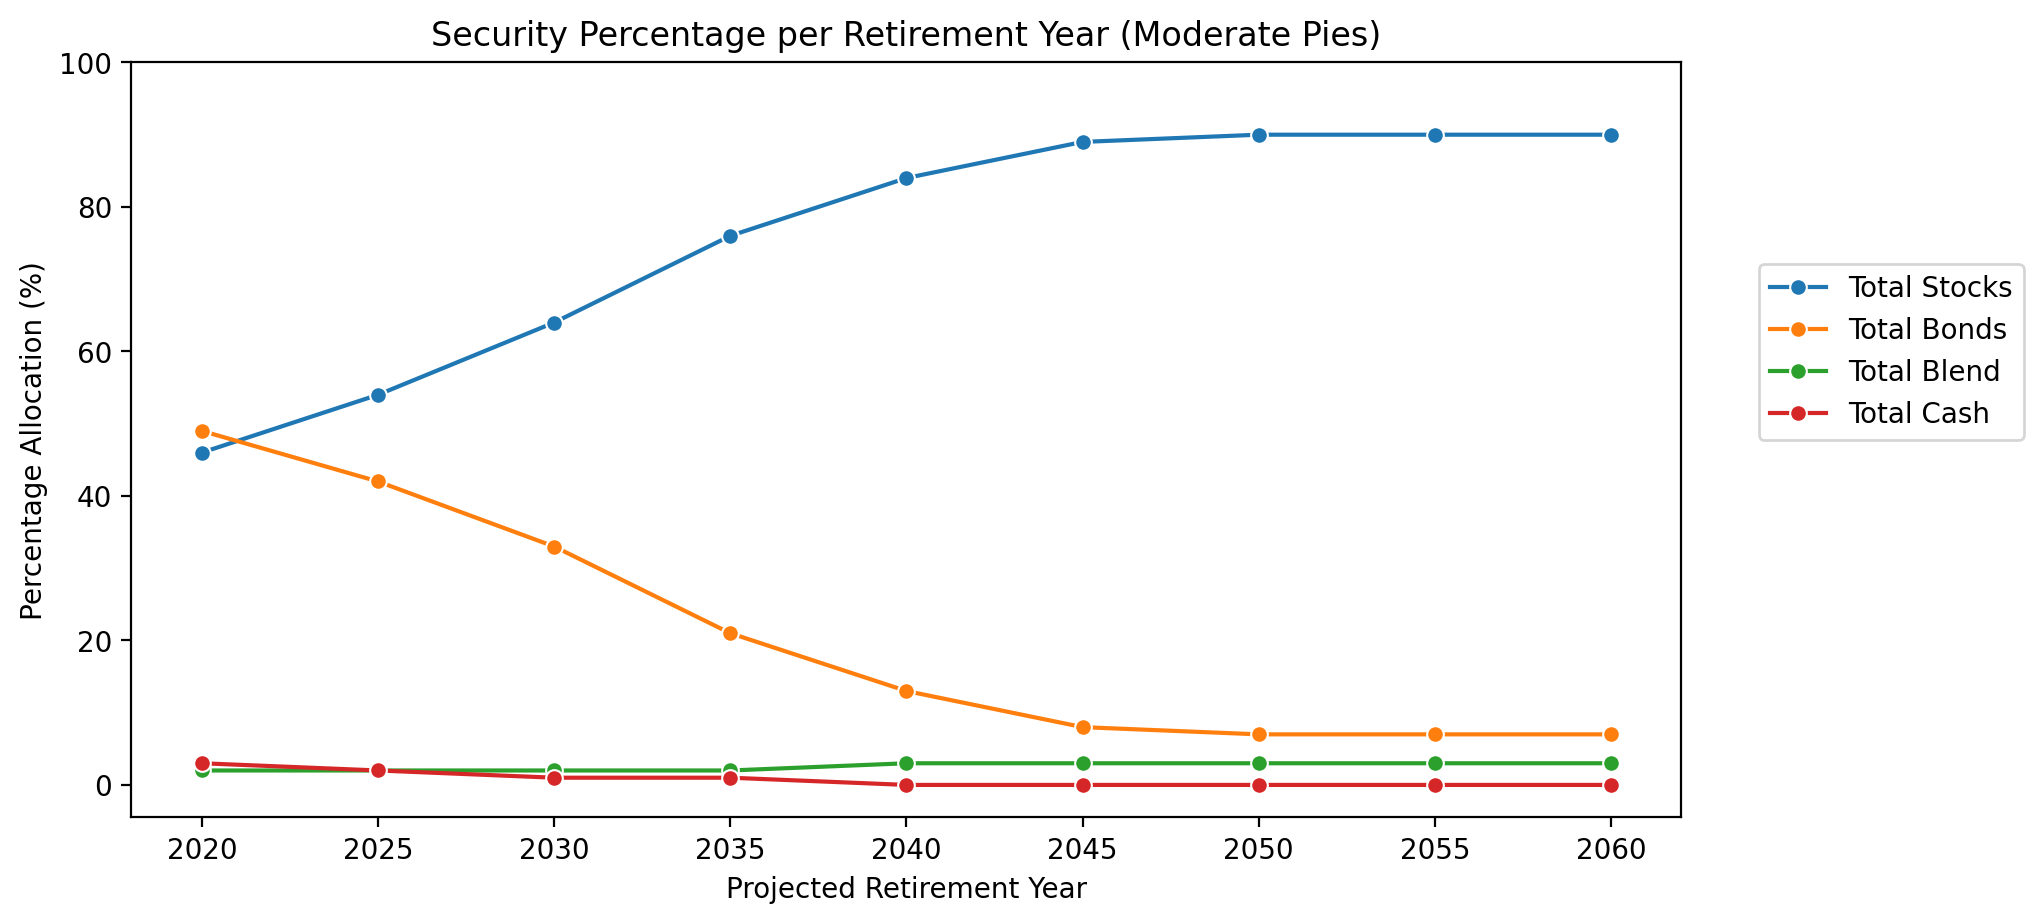

In [37]:
fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Moderate Pies)")
sns.lineplot(data=all_moderate[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks', marker='o')
sns.lineplot(data=all_moderate[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds', marker='o')
sns.lineplot(data=all_moderate[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend', marker='o')
sns.lineplot(data=all_moderate[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash', marker='o')
plt.xlabel("Projected Retirement Year")
plt.ylabel("Percentage Allocation (%)")
plt.legend(loc=(1.05,0.5))
plt.ylim(top=100)
plt.show()

<a id='4.5.6'></a>
<b>4.5.6 Trend Summary of % allocation per Security Type (Moderate Pies)</b>

<ol>
    <li>As the projected retirement year increases, percentage allocation into Stocks steadily increase as the allocation into Bonds decrease. Allocation into Cash and Blend Security Types remain relatively low (below 5%). </li>
    <li>The increase in Stock allocation and decrease in Bond allocation can be seen from 2020-2045, after which all percentage allocations appear to plateau and remain relatively constant.</li>
    <li>After 2025, the percentage allocation into Stocks remain above 50% of the total 'pie'.</li>
<ol>

<a id='4.5.7'></a>
<b>4.5.7 Visualizing percentage allocation of Security Types (Conservative Pies)</b>

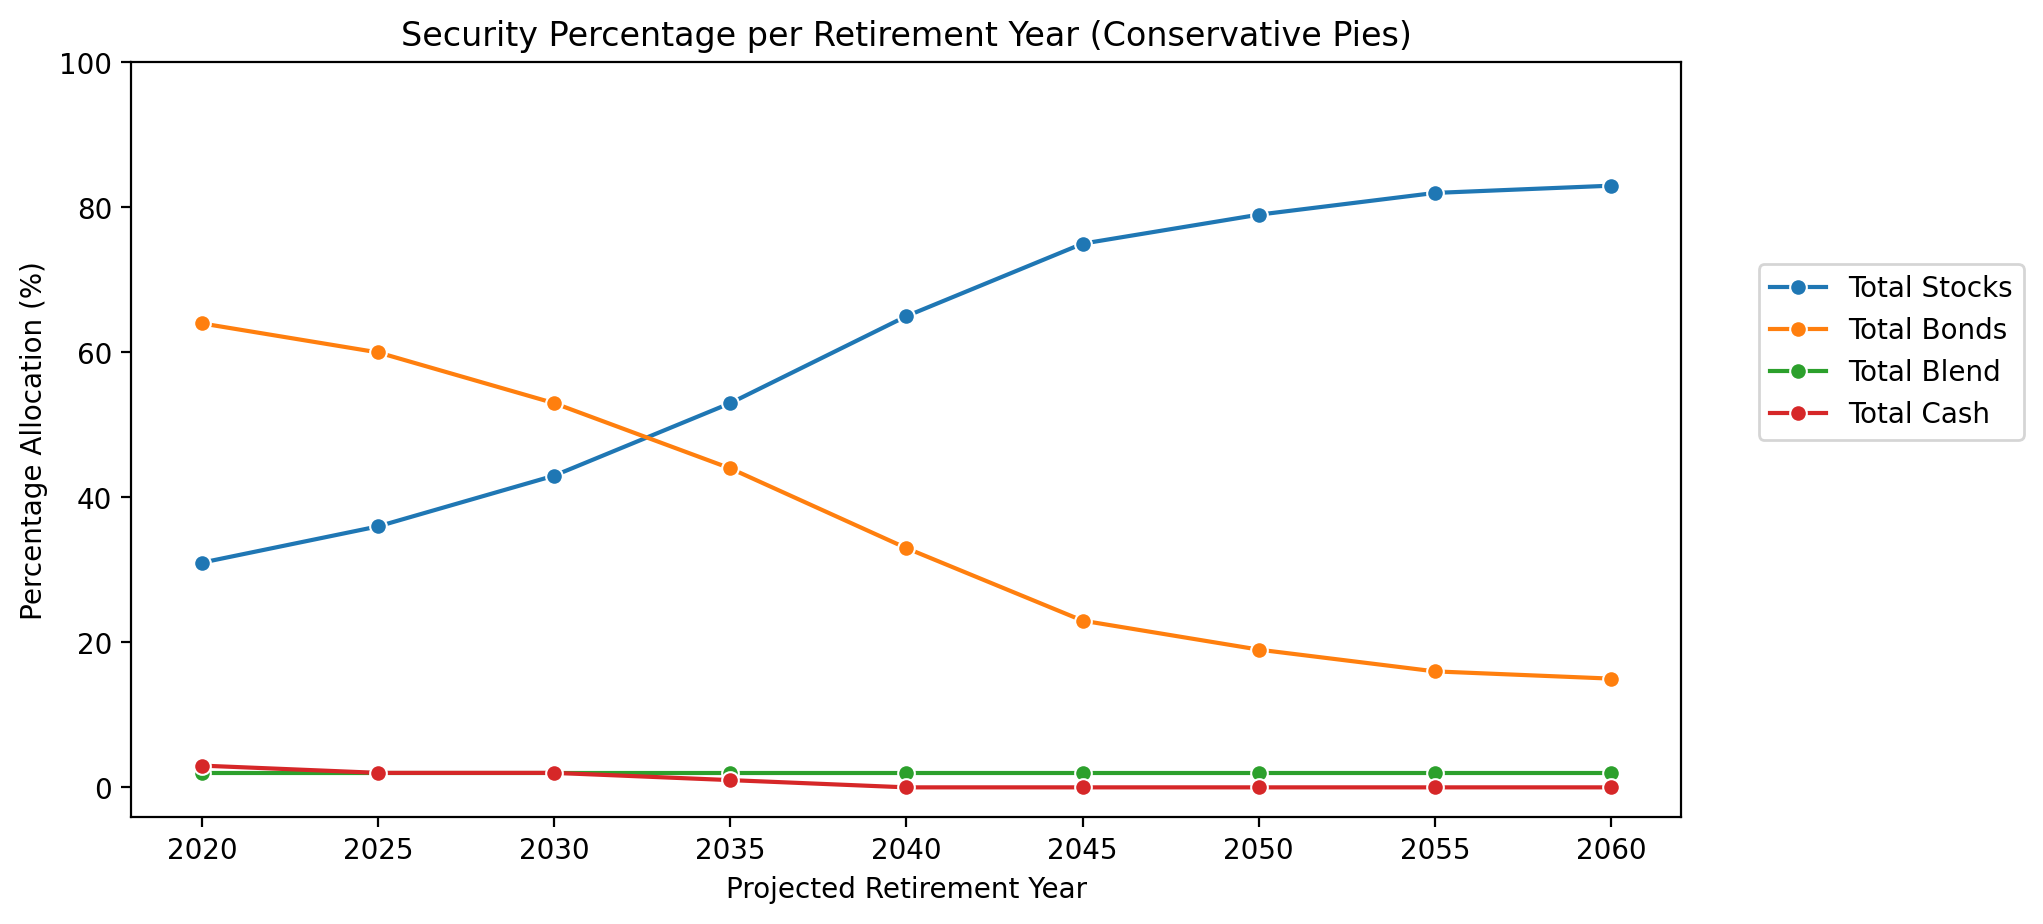

In [38]:
fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Conservative Pies)")
sns.lineplot(data=all_conservative[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks', marker='o')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds', marker='o')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend', marker='o')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash', marker='o')
plt.xlabel("Projected Retirement Year")
plt.ylabel("Percentage Allocation (%)")
plt.legend(loc=(1.05,0.5))
plt.ylim(top=100)
plt.show()

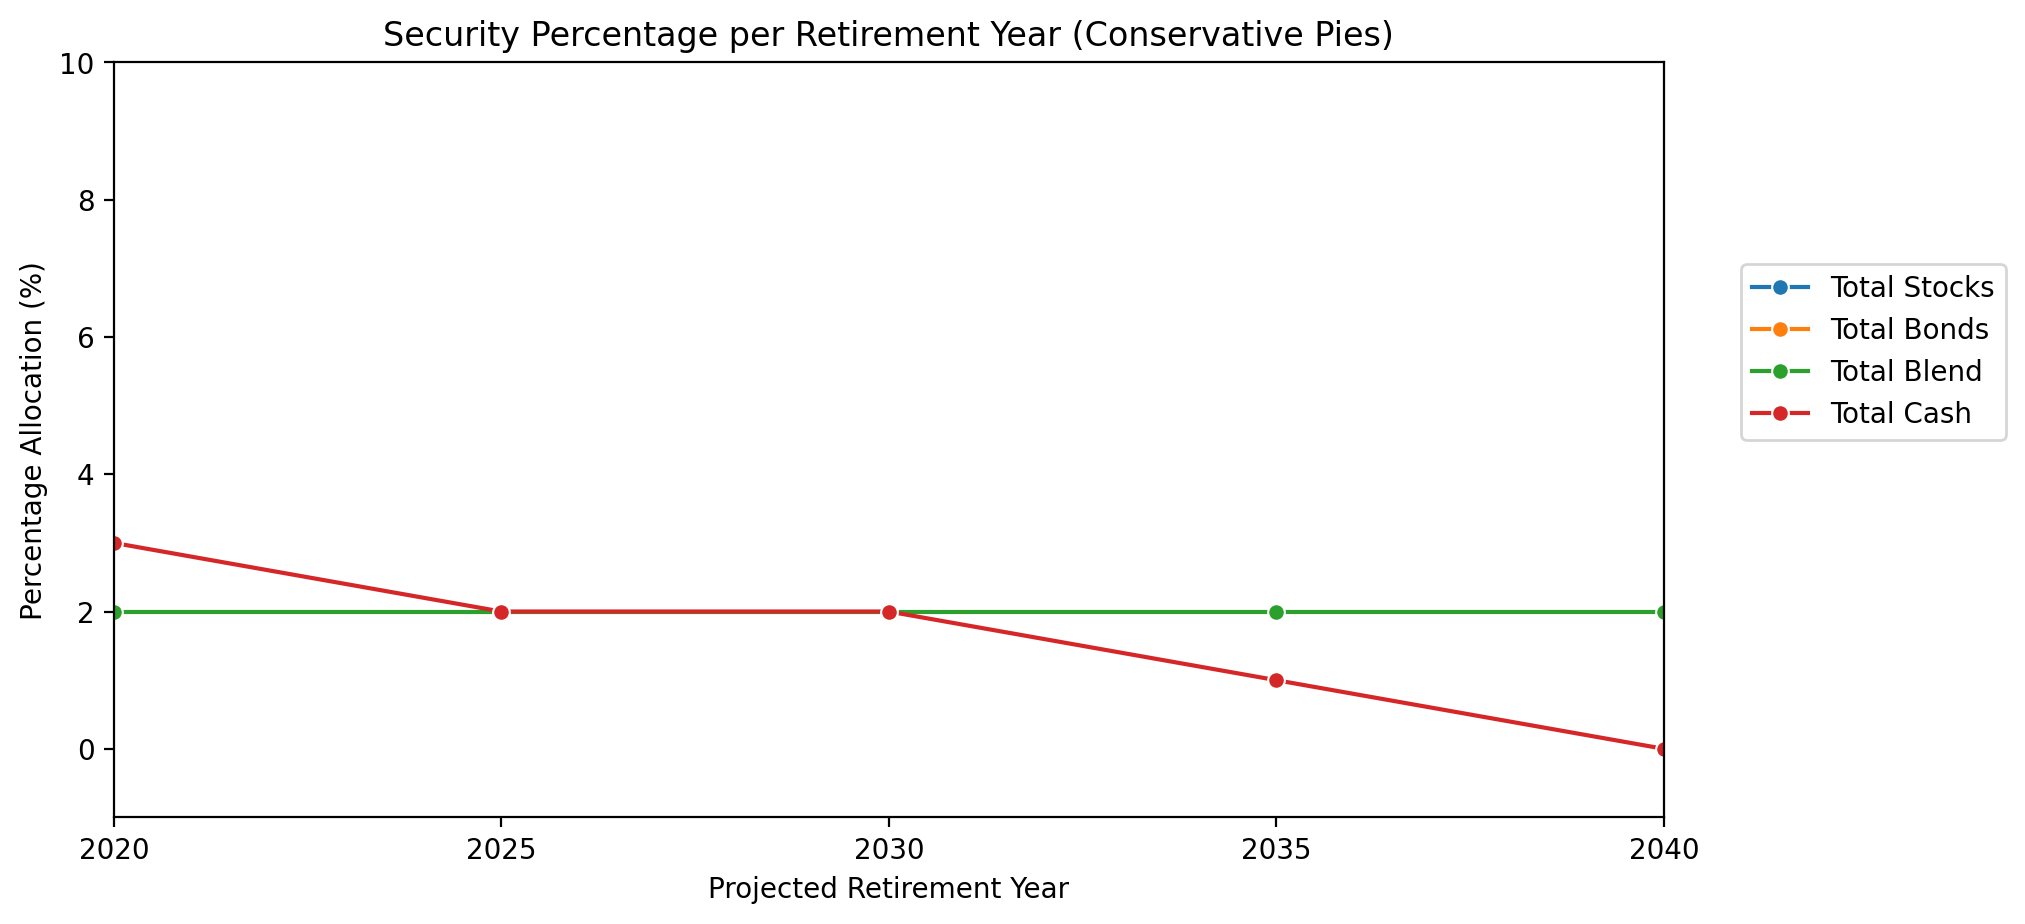

In [39]:
# Zoom in on x{2020:2035} and y{0:20}

fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Conservative Pies)")
sns.lineplot(data=all_conservative[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks', marker='o')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds', marker='o')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend', marker='o')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash', marker='o')
plt.xlabel("Projected Retirement Year")
plt.ylabel("Percentage Allocation (%)")
plt.legend(loc=(1.05,0.5))
plt.xlim(2020,2035)
plt.ylim(-1,10)
plt.xticks(np.arange(2020,2045,5))
plt.show()

<a id='4.5.8'></a>
<b>4.5.8 Trend Summary of % allocation per Security Type (Conservative Pies)</b>

<ol>
    <li>As projected retirement year increases, percentage allocation into Stocks increase while allocation into Bonds decrease.</li>
    <li>Starting from 2020, allocation into Stocks is lower than Bonds. The two trend lines converge between 2030 and 2035 after which allocation into Stocks increases and remains higher than Bonds until 2060.</li>
    <li>Percentage allocation into Cash remains relatively negligible (less than 5%) and becomes 0% after 2040.</li>
</ol>

<a id='4.6'></a>
### 4.6 Percentage Allocated per Individual Security

<a id='4.6.1'></a>
<b>4.6.1 Visualizing percentage allocation of individual securities (Aggressive Pies)</b>

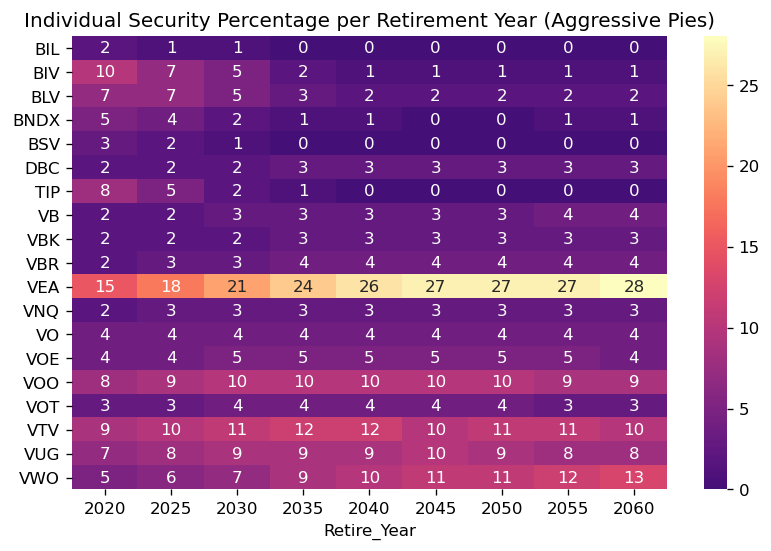

In [40]:
plt.figure(figsize=(8,5), dpi=120)
plt.title('Individual Security Percentage per Retirement Year (Aggressive Pies)')
sns.heatmap(data=all_aggressive[['Retire_Year','BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO']].set_index('Retire_Year').transpose(), cmap='magma', center=10, annot=True)
plt.show()

<a id='4.6.2'></a>
<strong>4.6.2 Post-Viz Questions on Percentage Allocation per Individual Security (Aggressive Pies)</strong>

In [41]:
# Which 5 securities have the HIGHEST percentage allocation in 2020 (Aggressive)?

all_aggressive[all_aggressive['Retire_Year']==2020].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2020,'Aggressive'), ascending=False).head(5)

Retire_Year,2020
Risk_Type,Aggressive
VEA,15
BIV,10
VTV,9
TIP,8
VOO,8


In [42]:
# Which 5 securities have the HIGHEST percentage allocation in 2060 (Aggressive)?

all_aggressive[all_aggressive['Retire_Year']==2060].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2060,'Aggressive'), ascending=False).head(5)

Retire_Year,2060
Risk_Type,Aggressive
VEA,28
VWO,13
VTV,10
VOO,9
VUG,8


In [43]:
# Which 5 securities have the LOWEST percentage allocation in 2020 (Aggressive)?

all_aggressive[all_aggressive['Retire_Year']==2020].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2020,'Aggressive')).head(5)

Retire_Year,2020
Risk_Type,Aggressive
BIL,2
VNQ,2
VBK,2
VB,2
DBC,2


In [44]:
# Which 5 securities have the LOWEST percentage allocation in 2060 (Aggressive)?

all_aggressive[all_aggressive['Retire_Year']==2060].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2060,'Aggressive')).head(5)

Retire_Year,2060
Risk_Type,Aggressive
BIL,0
BSV,0
TIP,0
BIV,1
BNDX,1


In [45]:
# Describing the statistics of each Individual Security as Retirement Year changes.

all_aggressive.loc[:,'BIL':'VWO'].describe()

# A few interesting statistics...
# a) Security with highest mean: VEA (mean=23.666) [.sort_values(axis=1, by="mean", ascending=False)]
# b) Security with the lowest mean: BIL (mean=0.444) [.sort_values(axis=1, by="mean", ascending=True)]
# c) Security with the highest standard deviation: VEA (std=4.637) [.sort_values(axis=1, by="std", ascending=False)]
# d) Security with the lowest standard deviation: VO (std=0.0) [.sort_values(axis=1, by"std", ascending=True)]

,BIL,BIV,BLV,BNDX,BSV,DBC,TIP,VB,VBK,VBR,VEA,VNQ,VO,VOE,VOO,VOT,VTV,VUG,VWO
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.444444,3.222222,3.555556,1.666667,0.666667,2.666667,1.777778,3.000000,2.666667,3.555556,23.666667,2.888889,4.0,4.666667,9.444444,3.555556,10.666667,8.555556,9.333333
std,0.726483,3.345810,2.185813,1.732051,1.118034,0.500000,2.862594,0.707107,0.500000,0.726483,4.636809,0.333333,0.0,0.500000,0.726483,0.527046,1.000000,0.881917,2.783882
min,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,15.000000,2.000000,4.0,4.000000,8.000000,3.000000,9.000000,7.000000,5.000000
25%,0.000000,1.000000,2.000000,1.000000,0.000000,2.000000,0.000000,3.000000,2.000000,3.000000,21.000000,3.000000,4.0,4.000000,9.000000,3.000000,10.000000,8.000000,7.000000
50%,0.000000,1.000000,2.000000,1.000000,0.000000,3.000000,0.000000,3.000000,3.000000,4.000000,26.000000,3.000000,4.0,5.000000,10.000000,4.000000,11.000000,9.000000,10.000000
75%,1.000000,5.000000,5.000000,2.000000,1.000000,3.000000,2.000000,3.000000,3.000000,4.000000,27.000000,3.000000,4.0,5.000000,10.000000,4.000000,11.000000,9.000000,11.000000
max,2.000000,10.000000,7.000000,5.000000,3.000000,3.000000,8.000000,4.000000,3.000000,4.000000,28.000000,3.000000,4.0,5.000000,10.000000,4.000000,12.000000,10.000000,13.000000


<a id='4.6.3'></a>
<b>4.6.3 Trend Summary of % allocation per Individual Security (Aggressive Pies)</b>

<ol>
    <li>In 2020, the 5 most important securities are VEA, BIV, VTV, TIP, and VOO. In 2060, VEA, VTV, and VOO remain important, however BIV and TIP allocations drop drastically (after 2030-2035) ) and are replaced by VWO and VUG.</li>
    <li>Regardless of projected retirement year, allocation into VEA remains much higher than other securities. In 2020, it is 5% higher than the second most important security while in 2060, this difference becomes 15%.</li>
    <li>On average, the most important securities (decided by mean allocation) are VEA, VTV, VOO, VWO, and VUG (they comprise more than 50% of the total pie). In contrast, the least important securities seem to be BIL, BSV, BNDX, TIP, DBC, VBK, and VNQ (they have mean allocations below 3%).</li>
    <li>The most variable securities (decided by standard deviation) are VEA, BIV, TIP. As seen in the heatmap, BIV and TIP drop harshly after 2030 and approach 0-1% allocation. VEA starts relatively high in 2020 and only continues to become more important as the projected retirement year increases.</li>
    <li>The least variable securities are VO, VNQ, DBC, VBK, and VOE (with standard deviations at or below 0.5%).</li>
</ol>

<a id='4.6.4'></a>
<b>4.6.4 Visualizing percentage allocation of individual securities (Moderate Pies)</b>

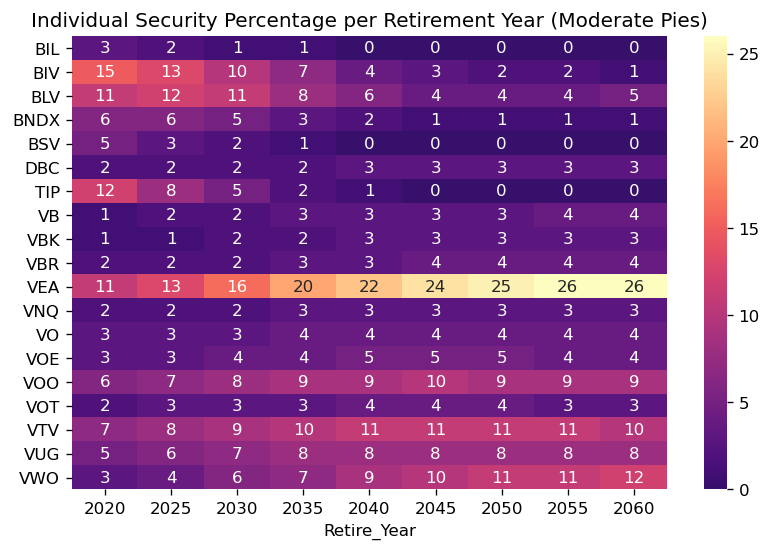

In [46]:
plt.figure(figsize=(8,5), dpi=120)
plt.title('Individual Security Percentage per Retirement Year (Moderate Pies)')
sns.heatmap(data=all_moderate[['Retire_Year','BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO']].set_index('Retire_Year').transpose(), cmap='magma', center=10, annot=True)
plt.show()

<a id='4.6.5'></a>
<strong>4.6.5 Post-Viz Questions on Percentage Allocation per Individual Security (Moderate Pies)</strong>

In [47]:
# Which 5 securities have the HIGHEST percentage allocation in 2020 (Moderate)?

all_moderate[all_moderate['Retire_Year']==2020].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2020,'Moderate'), ascending=False).head(5)

Retire_Year,2020
Risk_Type,Moderate
BIV,15
TIP,12
BLV,11
VEA,11
VTV,7


In [48]:
# Which 5 securities have the HIGHEST percentage allocation in 2060 (Moderate)?

all_moderate[all_moderate['Retire_Year']==2060].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2060,'Moderate'), ascending=False).head(5)

Retire_Year,2060
Risk_Type,Moderate
VEA,26
VWO,12
VTV,10
VOO,9
VUG,8


In [49]:
# Which 5 securities have the LOWEST percentage allocation in 2020 (Moderate)?

all_moderate[all_moderate['Retire_Year']==2020].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2020,'Moderate')).head(5)

Retire_Year,2020
Risk_Type,Moderate
VBK,1
VB,1
VBR,2
VOT,2
VNQ,2


In [50]:
# Which 5 securities have the LOWEST percentage allocation in 2060 (Moderate)?

all_moderate[all_moderate['Retire_Year']==2060].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2060,'Moderate')).head(5)

Retire_Year,2060
Risk_Type,Moderate
BIL,0
BSV,0
TIP,0
BIV,1
BNDX,1


In [51]:
# Describing the statistics of each Individual Security as Retirement Year changes.

all_moderate.loc[:,'BIL':'VWO'].describe()

# A few interesting statistics...
# a) Security with highest mean: VEA (mean=20.333) [.sort_values(axis=1, by="mean", ascending=False)]
# b) Security with the lowest mean: BIL (mean=0.777) [.sort_values(axis=1, by="mean", ascending=True)]
# c) Security with the highest standard deviation: VEA (std=5.723) [.sort_values(axis=1, by="std", ascending=False)]
# d) Security with the lowest standard deviation: VO (std=0.500) [.sort_values(axis=1, by"std", ascending=True)]

,BIL,BIV,BLV,BNDX,BSV,DBC,TIP,VB,VBK,VBR,VEA,VNQ,VO,VOE,VOO,VOT,VTV,VUG,VWO
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.777778,6.333333,7.222222,2.888889,1.222222,2.555556,3.111111,2.777778,2.333333,3.111111,20.333333,2.666667,3.666667,4.111111,8.444444,3.222222,9.777778,7.333333,8.111111
std,1.092906,5.196152,3.345810,2.204793,1.787301,0.527046,4.342938,0.971825,0.866025,0.927961,5.722762,0.500000,0.500000,0.781736,1.236033,0.666667,1.481366,1.118034,3.257470
min,0.000000,1.000000,4.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,3.000000,6.000000,2.000000,7.000000,5.000000,3.000000
25%,0.000000,2.000000,4.000000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,16.000000,2.000000,3.000000,4.000000,8.000000,3.000000,9.000000,7.000000,6.000000
50%,0.000000,4.000000,6.000000,2.000000,0.000000,3.000000,1.000000,3.000000,3.000000,3.000000,22.000000,3.000000,4.000000,4.000000,9.000000,3.000000,10.000000,8.000000,9.000000
75%,1.000000,10.000000,11.000000,5.000000,2.000000,3.000000,5.000000,3.000000,3.000000,4.000000,25.000000,3.000000,4.000000,5.000000,9.000000,4.000000,11.000000,8.000000,11.000000
max,3.000000,15.000000,12.000000,6.000000,5.000000,3.000000,12.000000,4.000000,3.000000,4.000000,26.000000,3.000000,4.000000,5.000000,10.000000,4.000000,11.000000,8.000000,12.000000


<a id='4.6.6'></a>
<b>4.6.6 Trend Summary of % allocation per Individual Security (Moderate Pies)</b>

<ol>
    <li>In 2020, the 5 most important securities are BIV, TIP, BLV, VEA, and VTV. In 2060, VEA and VTV remain important, but the other three securities are replaced by VWO, VOO, and VUG. </li>
    <li>Regardless of Projected Retirement Year, VEA appears to remain an important security ranging from 11% to 26% allocation.</li>
    <li>Early on BIV, BLV, and TIP appear important (even moreso than the Aggressive Pies), but Moderate Pies follow the same pattern as Aggressive in that priority shifts more towards VEA, VOO, VTV, and VUG as retirement year increases.</li>
    <li>On average, the most important securities across all retirement years (determined by mean allocation) are VEA (mean of 20.333) followed by VTV, VOO, and VWO (means of 8%-10%).</li>
    <li>The least important securities are BIL and BSV (mean allocations below 2%).</li>
    <li>The most variable securities (determined by standard deviation) are VEA, BIV, and TIP (std above 4%).</li>
    <li>The least variable securities are VO and VNQ (std = 0.5%).</li>
</ol>

<a id='4.6.7'></a>
<b>4.6.7 Visualizing percentage allocation of individual securities (Conservative Pies)</b>

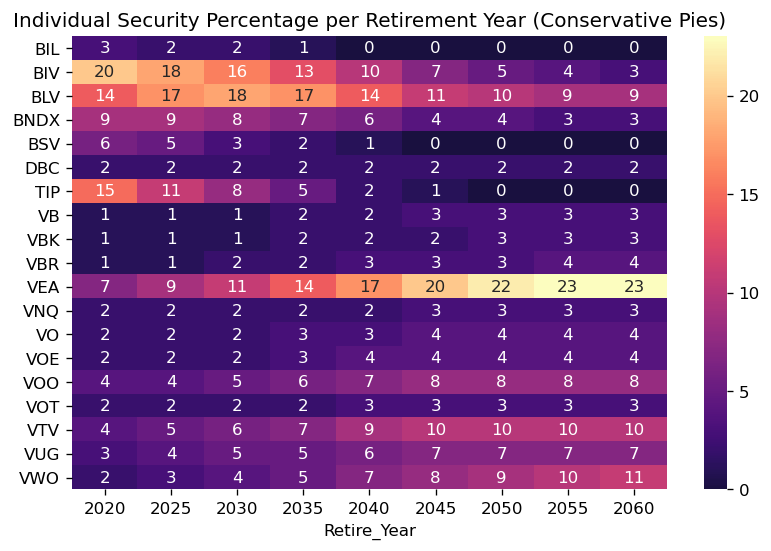

In [52]:
plt.figure(figsize=(8,5), dpi=120)
plt.title('Individual Security Percentage per Retirement Year (Conservative Pies)')
sns.heatmap(data=all_conservative[['Retire_Year','BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO']].set_index('Retire_Year').transpose(), cmap='magma', center=10, annot=True)
plt.show()

<a id='4.6.8'></a>
<b>4.6.8 Post-Viz Questions on Percentage Allocation per Individual Security (Conservative Pies)</b>

In [53]:
# Which 5 securities have the HIGHEST percentage allocation in 2020 (Conservative)?

all_conservative[all_conservative['Retire_Year']==2020].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2020,'Conservative'), ascending=False).head(5)

Retire_Year,2020
Risk_Type,Conservative
BIV,20
TIP,15
BLV,14
BNDX,9
VEA,7


In [54]:
# Which 5 securities have the HIGHEST percentage allocation in 2060 (Conservative)?

all_conservative[all_conservative['Retire_Year']==2060].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2060,'Conservative'), ascending=False).head(5)

Retire_Year,2060
Risk_Type,Conservative
VEA,23
VWO,11
VTV,10
BLV,9
VOO,8


In [55]:
# Which 5 securities have the LOWEST percentage allocation in 2020 (Conservative)?

all_conservative[all_conservative['Retire_Year']==2020].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2020,'Conservative'), ascending=True).head(5)

Retire_Year,2020
Risk_Type,Conservative
VBR,1
VBK,1
VB,1
VOT,2
VOE,2


In [56]:
# Which 5 securities have the LOWEST percentage allocation in 2060 (Conservative)?

all_conservative[all_conservative['Retire_Year']==2060].set_index(keys=['Retire_Year','Risk_Type']).transpose().loc['BIL':'VWO'].sort_values(by=(2060,'Conservative'), ascending=True).head(5)

Retire_Year,2060
Risk_Type,Conservative
BIL,0
BSV,0
TIP,0
DBC,2
BIV,3


In [57]:
# Describing the statistics of each Individual Security as Retirement Year changes.

all_conservative.loc[:,'BIL':'VWO'].describe()

# A few interesting statistics...
# a) Security with highest mean: VEA (mean=16.222) [.sort_values(axis=1, by="mean", ascending=False)]
# b) Security with the lowest mean: BIL (mean=0.889) [.sort_values(axis=1, by="mean", ascending=True)]
# c) Security with the highest standard deviation: BIV (std=6.364) [.sort_values(axis=1, by="std", ascending=False)]
# d) Security with the lowest standard deviation: DBC (std=0.0) [.sort_values(axis=1, by"std", ascending=True)]

,BIL,BIV,BLV,BNDX,BSV,DBC,TIP,VB,VBK,VBR,VEA,VNQ,VO,VOE,VOO,VOT,VTV,VUG,VWO
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.888889,10.666667,13.222222,5.888889,1.888889,2.0,4.666667,2.111111,2.000000,2.555556,16.222222,2.444444,3.111111,3.222222,6.444444,2.555556,7.888889,5.666667,6.555556
std,1.166667,6.363961,3.597839,2.472066,2.315407,0.0,5.522681,0.927961,0.866025,1.130388,6.220486,0.527046,0.927961,0.971825,1.740051,0.527046,2.420973,1.500000,3.205897
min,0.000000,3.000000,9.000000,3.000000,0.000000,2.0,0.000000,1.000000,1.000000,1.000000,7.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4.000000,3.000000,2.000000
25%,0.000000,5.000000,10.000000,4.000000,0.000000,2.0,0.000000,1.000000,1.000000,2.000000,11.000000,2.000000,2.000000,2.000000,5.000000,2.000000,6.000000,5.000000,4.000000
50%,0.000000,10.000000,14.000000,6.000000,1.000000,2.0,2.000000,2.000000,2.000000,3.000000,17.000000,2.000000,3.000000,4.000000,7.000000,3.000000,9.000000,6.000000,7.000000
75%,2.000000,16.000000,17.000000,8.000000,3.000000,2.0,8.000000,3.000000,3.000000,3.000000,22.000000,3.000000,4.000000,4.000000,8.000000,3.000000,10.000000,7.000000,9.000000
max,3.000000,20.000000,18.000000,9.000000,6.000000,2.0,15.000000,3.000000,3.000000,4.000000,23.000000,3.000000,4.000000,4.000000,8.000000,3.000000,10.000000,7.000000,11.000000


<a id='4.6.9'></a>
<b>4.6.9 Trend Summary of % allocation per Individual Security (Conservative Pies)</b>

<ol>
    <li>In 2020, the most important securities are BIV, TIP, BLV, BNDX, and VEA. By 2060, VEA and BLV are still in the top 5 but others are replaced by VWO, VTV, and VOO.</li>
    <li>Conservative Pies seem to have a more extreme allocation difference between the early and later retirement years. Early on BIV, BLV, and TIP have much higher allocations relative to more aggressive pies of the same year. They eventually shift towards the same securities seen before (VEA, VOO, VTV, and VUG) but the transition is much slower in this case. That "shift" happens around 2040 compared to ~2030 with the more aggressive risk types. Into 2060, BLV remains relatively high in percent allocation (quite uncharacteristic when compared to the previous visualizations).</li>
    <li>On average, the most important securities (determined by mean allocation) are VEA, BLV, and BIV (mean allocations above 10%). The least important securities are BIL and BSV (mean allocations below 2%).</li>
    <li>The most variable securities (determined by standard deviation) are BIV, VEA, and TIP (std above 5%).</li>
    <li>The least variable securities is DBC which does not change allocation AT ALL regardless of projected retirement year (std = 0%).</li>
</ol>

<a id='4.7'></a>
### 4.7 Geographical Concentrations of Securities

<a id='4.7.1'></a>
<b>4.7.1 Creating aggregations of the data for primary Geographical Concentration of Securities</b>

In [58]:
raw['US_Conc'] = raw['BIV'] + raw['BLV'] + raw['BSV'] + raw['TIP'] + raw['VB'] + raw['VBK'] + raw['VBR'] + raw['VNQ'] + raw['VO'] + raw['VOE'] +raw['VOO'] + raw['VOT'] + raw['VTV'] + raw['VUG']
raw['Intl_Conc']= raw['BNDX'] + raw['VEA'] + raw['VWO']
raw['Mixed_Conc'] = raw['DBC']
raw['Nongeo_Conc'] = raw['BIL']

<a id='4.7.2'></a>
<b>4.7.2 Visualizing the Percentage Allocation of each Geographical Concentration</b>

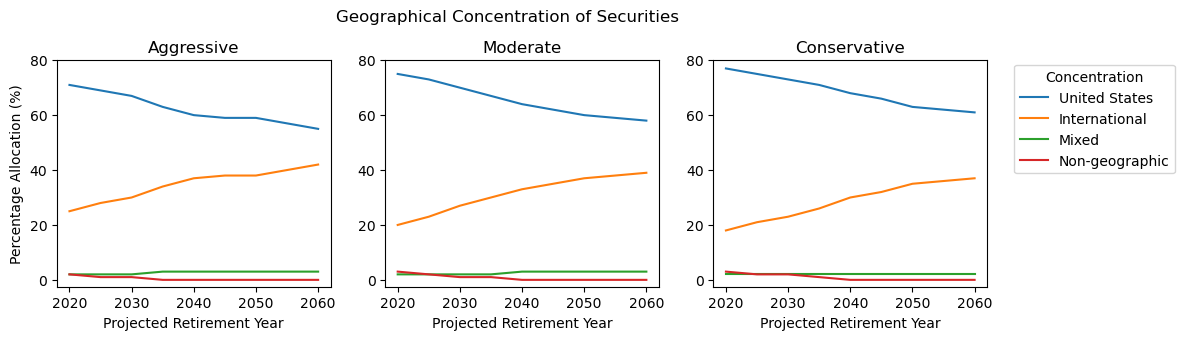

In [59]:
fig,ax= plt.subplots(nrows=1, ncols=3, dpi=100)
fig.set_size_inches(12,3)
fig.suptitle(t='Geographical Concentration of Securities', y=1.05)

#First Chart (Aggressive)
ax[0].set_title("Aggressive")
ax[0].set_ylabel("Percentage Allocation (%)")
ax[0].set_ylim(-2.5,80)
ax[0].set_xlabel("Projected Retirement Year")
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='US_Conc', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Intl_Conc', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Mixed_Conc', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Nongeo_Conc', ax=ax[0])

#Second Chart (Moderate)
ax[1].set_title("Moderate")
ax[1].set_xlabel("Projected Retirement Year")
ax[1].set_ylabel(" ")
ax[1].set_ylim(-2.5,80)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='US_Conc', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Intl_Conc', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Mixed_Conc', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Nongeo_Conc', ax=ax[1])

#Third Chart (Conservative)
ax[2].set_title("Conservative")
ax[2].set_xlabel("Projected Retirement Year")
ax[2].set_ylabel(" ")
ax[2].set_ylim(-2.5,80)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='US_Conc', ax=ax[2], label='United States')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Intl_Conc', ax=ax[2], label='International')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Mixed_Conc', ax=ax[2], label='Mixed')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Nongeo_Conc', ax=ax[2], label='Non-geographic')
ax[2].legend(title='Concentration', loc=(1.1,0.5))

plt.show()

<a id='4.7.3'></a>
<b>4.7.3 Trend Summary of % allocation per Geographical Concentration (Conservative Pies)</b>

<ol>
    <li>The apparent trend in Geographical Concentration of Securities regardless of risk type is that United States securities start relatively high (70-80%) and taper down while International securities start around 20% and increase as projected retirement year increases.</li>
    <li>The two major trend lines don't converge as of 2060 but they do approach each other. Mixed and Non-geographic security concentrations remain relatively negligible regardless of risk type.</li>
    <li>The main difference between risk types is that as pies become more conservative, United States concentration starts and remains slightly higher while that of International is slightly lower. The difference between United States and Internaational concentrations also become larger as pies become more conservative.</li>
    <li>Regardless of projected retirement year or risk type, United States concentration remain above 50% while International concentration remain roughly between 20% and 40%. Mixed concentration remains below 10% while Non-geographic approaches or becomes 0% by 2060 for all three risk types.</li>
</ol>

<a id='4.8'></a>
### 4.8 General Cap Preference (Small / Mid / Large)

<a id='4.8.1'></a>
<b>4.8.1 Creating views of the data for each cap size</b>

In [60]:
raw['Small_Cap'] = raw['VB'] + raw['VBK'] + raw['VBR']
raw['Mid_Cap'] = raw['VO'] + raw['VOE'] + raw['VOT']
#No large cap ETFs in the M1 Expert Pies

<a id='4.8.2'></a>
<b>4.8.2 Visualizing the Percentage Allocation of each Cap Size</b>

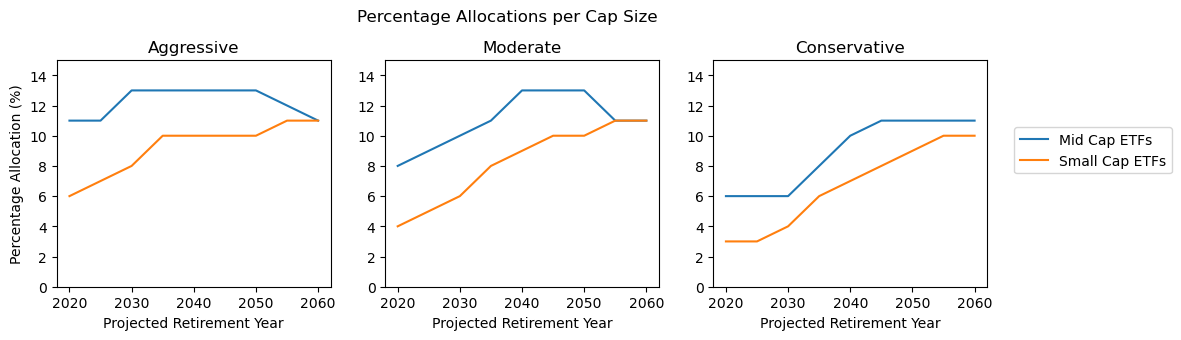

In [61]:
fig,ax= plt.subplots(nrows=1, ncols=3, dpi=100)
fig.set_size_inches(12,3)
fig.suptitle(t='Percentage Allocations per Cap Size', y=1.05)

#First Chart (Aggressive)
ax[0].set_title("Aggressive")
ax[0].set_ylabel("Percentage Allocation (%)")
ax[0].set_xlabel("Projected Retirement Year")
ax[0].set_ylim(0,15)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Mid_Cap', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Small_Cap', ax=ax[0])

#Second Chart (Moderate)
ax[1].set_title("Moderate")
ax[1].set_xlabel("Projected Retirement Year")
ax[1].set_ylabel(' ')
ax[1].set_ylim(0,15)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Mid_Cap', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Small_Cap', ax=ax[1])

#Third Chart (Conservative)
ax[2].set_title("Conservative")
ax[2].set_xlabel("Projected Retirement Year")
ax[2].set_ylabel(' ')
ax[2].set_ylim(0,15)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Mid_Cap', ax=ax[2], label='Mid Cap ETFs')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Small_Cap', ax=ax[2], label='Small Cap ETFs')
ax[2].legend(loc=(1.1,0.5))

plt.show()

<a id='4.8.3'></a>
<b>4.8.3 Trend Summary of % allocation per Cap Size</b>

Aggressive Pie Trends:
<ol>
    <li>As projected retirement year increases, allocation into Mid Cap ETFs remain between 11% and 13%. No predictive trend behavior is visible.</li>
    <li>However, a clearer trend is visible for allocation into Small Cap ETFs. As projected retirement year increases, so too does Small Cap allocation. It starts at 6% in 2020 and rises to 11% by 2060.</li>
</ol>
    
Moderate Pie Trends:
<ol>
    <li>Between 2020 and 2040, allocation into Mid Cap ETFs increase before plateauing until 2050. Allocation subsequently decreases until 2055 after which it plateaus again into 2060. Mid Cap ETF allocation remains within 8%-13% regardless of projected retirement year. Once again, no definite predictive trend is visible.</li>
    <li>Allocation into Small Cap ETFs consistently increase as projected retirement year increases. It starts at 4% in 2020 and rises to 11% in 2055 before plateauing into 2060 (where it converges with Mid Cap ETF allocation).</li>
</ol>
    
Conservative Pie Trends:
<ol>
    <li>Mid Cap ETF allocation plateaus at 6% until 2030, then increases until 2045 before plateauing once again at 11% into 2060.</li>
    <li>Small Cap ETF allocation slightly plateaus for the first 5 years, then consistently increases until 2050 where it is seen to plateau at 10% into 2060.</li>
    <li>For conservative pies, both Mid Cap and Small Cap ETF allocation can be said to either plateau or increase as projected retirement year increases.</li>
</ol>

Overall Trend: Regardless of projected retirement year or risk type, allocation into Mid Cap ETFs is always the same or greater than that into Small Cap ETFs.

<a id='4.9'></a>
### 4.9 Preference of Value vs. Growth ETFs

<a id='4.9.1'></a>
<b>4.9.1 Creating views of the data for Value and Growth ETFs</b>

In [62]:
raw['Growth'] = raw['VBK'] + raw['VOT'] + raw['VUG']
raw['Value'] = raw['VBR'] + raw['VOE'] + raw['VTV']

<a id='4.9.2'></a>
<b>4.9.2 Visualizing the Percentage Allocations of Value vs. Growth ETFs</b>

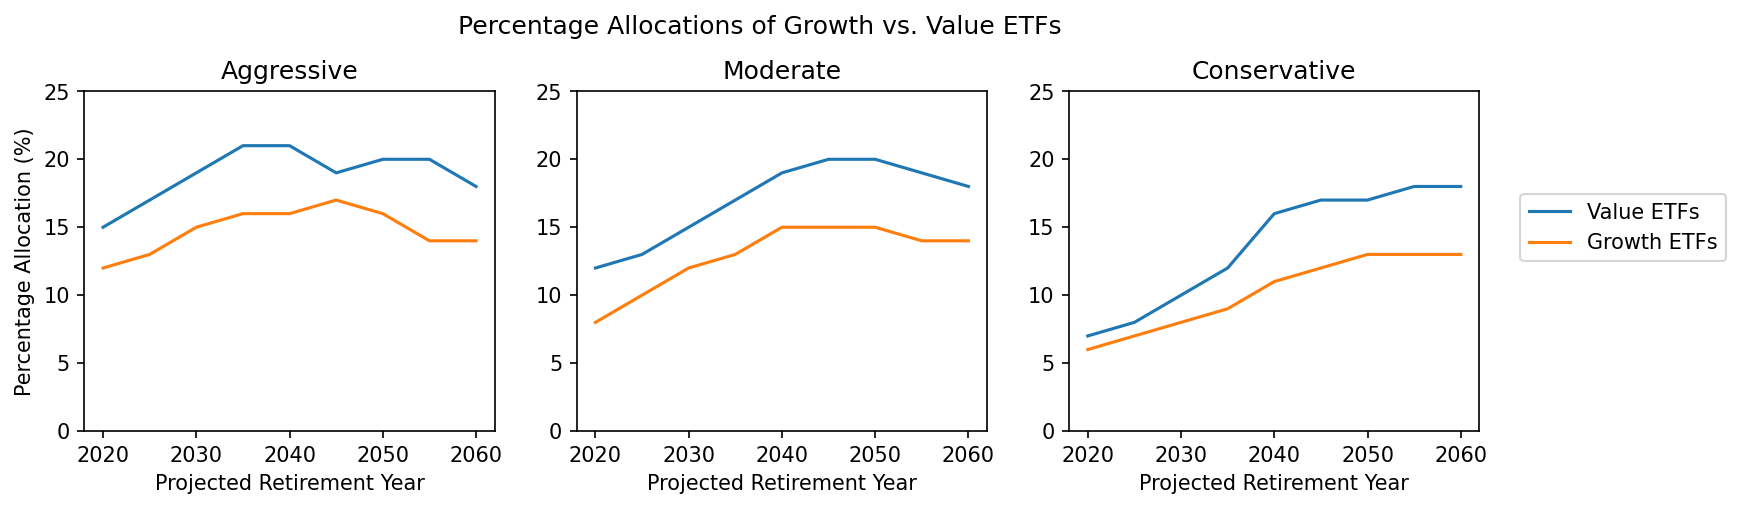

In [63]:
fig,ax= plt.subplots(nrows=1, ncols=3, dpi=150)
fig.set_size_inches(12,3)
fig.suptitle(t='Percentage Allocations of Growth vs. Value ETFs', y=1.05)

#First Chart (Aggressive)
ax[0].set_title("Aggressive")
ax[0].set_ylabel("Percentage Allocation (%)")
ax[0].set_xlabel("Projected Retirement Year")
ax[0].set_ylim(0,25)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Value', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Growth', ax=ax[0])

#Second Chart (Moderate)
ax[1].set_title("Moderate")
ax[1].set_xlabel("Projected Retirement Year")
ax[1].set_ylabel(' ')
ax[1].set_ylim(0,25)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Value', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Growth', ax=ax[1])

#Third Chart (Conservative)
ax[2].set_title("Conservative")
ax[2].set_xlabel("Projected Retirement Year")
ax[2].set_ylabel(' ')
ax[2].set_ylim(0,25)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Value', ax=ax[2], label='Value ETFs')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Growth', ax=ax[2], label='Growth ETFs')
ax[2].legend(loc=(1.1,0.5))

plt.show()

<a id='4.9.3'></a>
<b>4.9.3 Trend Summary of % allocation for Value vs. Growth ETFs</b>

Aggressive Pie Trends:
<ol>
    <li>Allocation into Value ETFs remain between 15% and 20% regardless of projected retirement year. The trend line is seen to increase until 2030, drop until 2040, then perform another slight rise and drop into 2060. The rapid drop in allocation at 2045 appears uncharacteristic when compared to the smoother trend lines in the more conservative pie visualizations.</li>
    <li>Allocation into Growth ETFs remain between 11% and 16% regardless of projected retirement year. The trend line steadily increases until 2045 before decreasing until 2055, after which is plateaus at 13% into 2060.</li>
</ol>

Moderate Pie Trends:
<ol>
    <li>Allocation into Value ETFs increase from 11%-20% between 2020-2045 where it then plateaus for 5 years and then decreases into 2060 (ending just above 15%).</li>
    <li>Allocation into Growth ETFs increase between 2020-2040 before plateauing until 2050 and declining slightly at 2055 before plateauing again.</li>
</ol>

Conservative Pie Trends:
<ol>
    <li>Allocation into Value ETFs can be said to generally increase between 2020-2060, going from 7% to 17% over that time.</li>
    <li>Allocation into Growth ETFs increase between 2020-2050 before plateauing into 2060 (at 13% allocation). Allocation starts at 6% in 2020.</li>
</ol>

Overall Trend: Regardless of projected retirement year or risk type, allocation into Value ETFs is always higher than that into Growth ETFs.

## 5.0 Future Plans for this Project

If I were to expand on this project in the future, I would like to...
<ol>
    <li>Replicate the data cleaning and exploration process utilizing SQL queries. This would be desirable if the data came from a periodically updating database as opposed to a static CSV file.</li>
    <li>Recreate the CSV file used for this project by webscraping the M1 Finance website (initially I had inputted all the data manually into Microsoft Excel before converting it into a CSV file).</li>
    <li>Recreate the various data visualizations using an interactive software such as Tableau or Power BI.</li>
    <li>Create and apply a machine learing algorithm to the data set and see how well it can predict future trends (assuming M1 Finance continues to update their expert pie recommendations in the coming years).</li>
</ol>